# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Цель исследования**

1. Провести анализ данных о недвижимости. 
2. Выявить ключевые факторы, влияющие на ценообразование.
3. Исследовать зависимость стоимости квартир от различных параметров.
4. Провести анализ влияния географического расположения, а также времени размещения объявления (день недели, месяц, год).
5. Получить подробную картину о рынке недвижимости на основе доступных данных.
6. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.

**Ход исследования**


Моё исследование будет состоять из нескольких этапов, которые включают в себя проверку данных, предобработку, создание новых столбцов и подробный анализ факторов, влияющих на цену недвижимости. Исходные данные я получу из файла "/datasets/real_estate_data.csv", однако о качестве этих данных ничего не известно на начальном этапе. Поэтому первым шагом будет обзор данных с целью выявления ошибок и недочетов, а также оценки их возможного влияния на результаты исследования. После этого я займусь исправлением обнаруженных ошибок, чтобы минимизировать их влияние на финальные выводы.

Далее, я создам необходимые дополнительные столбцы для дальнейшего анализа, таких как "цена за квадратный метр", "день недели", "тип этажа" и другие, чтобы подготовить данные для более глубокого анализа. На основе этих столбцов будет проведен исследовательский анализ данных.

Моё исследование будет проходить в семь этапов:

- Обзор данных — изучение исходных данных, поиск ошибок и проблем с качеством.
- Предобработка данных — исправление ошибок и заполнение пропущенных значений, если это необходимо.
- Расчеты и добавление результатов в таблицу — создание новых столбцов (например, "цена за квадратный метр", "день недели", "тип этажа").
- Проведение анализа для Ленинградской области — анализ характеристик недвижимости в Ленинградской области.
- Проведение анализа для Санкт-Петербурга — анализ характеристик недвижимости в Санкт-Петербурге.
- Различаются ли факторы, которые влияют на ценообразование стоимости квартир — изучение факторов, влияющих на цену недвижимости, в разных регионах.
- Написание общего вывода — обобщение полученных результатов и выводы о закономерностях и особенностях рынка недвижимости.


### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd # Импортируем библиотеки для работы с данными

import matplotlib.pyplot as plt # Импортируем библиотеки для визуализации
import numpy as np
import seaborn as sns


In [2]:
#data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')  # Загрузка данных




data = pd.read_csv('real_estate_data.csv', sep='\t')  # Загрузка данных


In [3]:
data.head(10) # Вывод первых строк данных

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info() # Общая информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

23 699 строк, 22 столбца — хорошая выборка 

Проблемы с пропусками: ceiling_height — ~9 200 пропусков, living_area, kitchen_area, balcony, is_apartment, airports_nearest и другие — также неполные 

Типы данных:
first_day_exposition — object, но должна быть datetime, остальное кажется корректно 

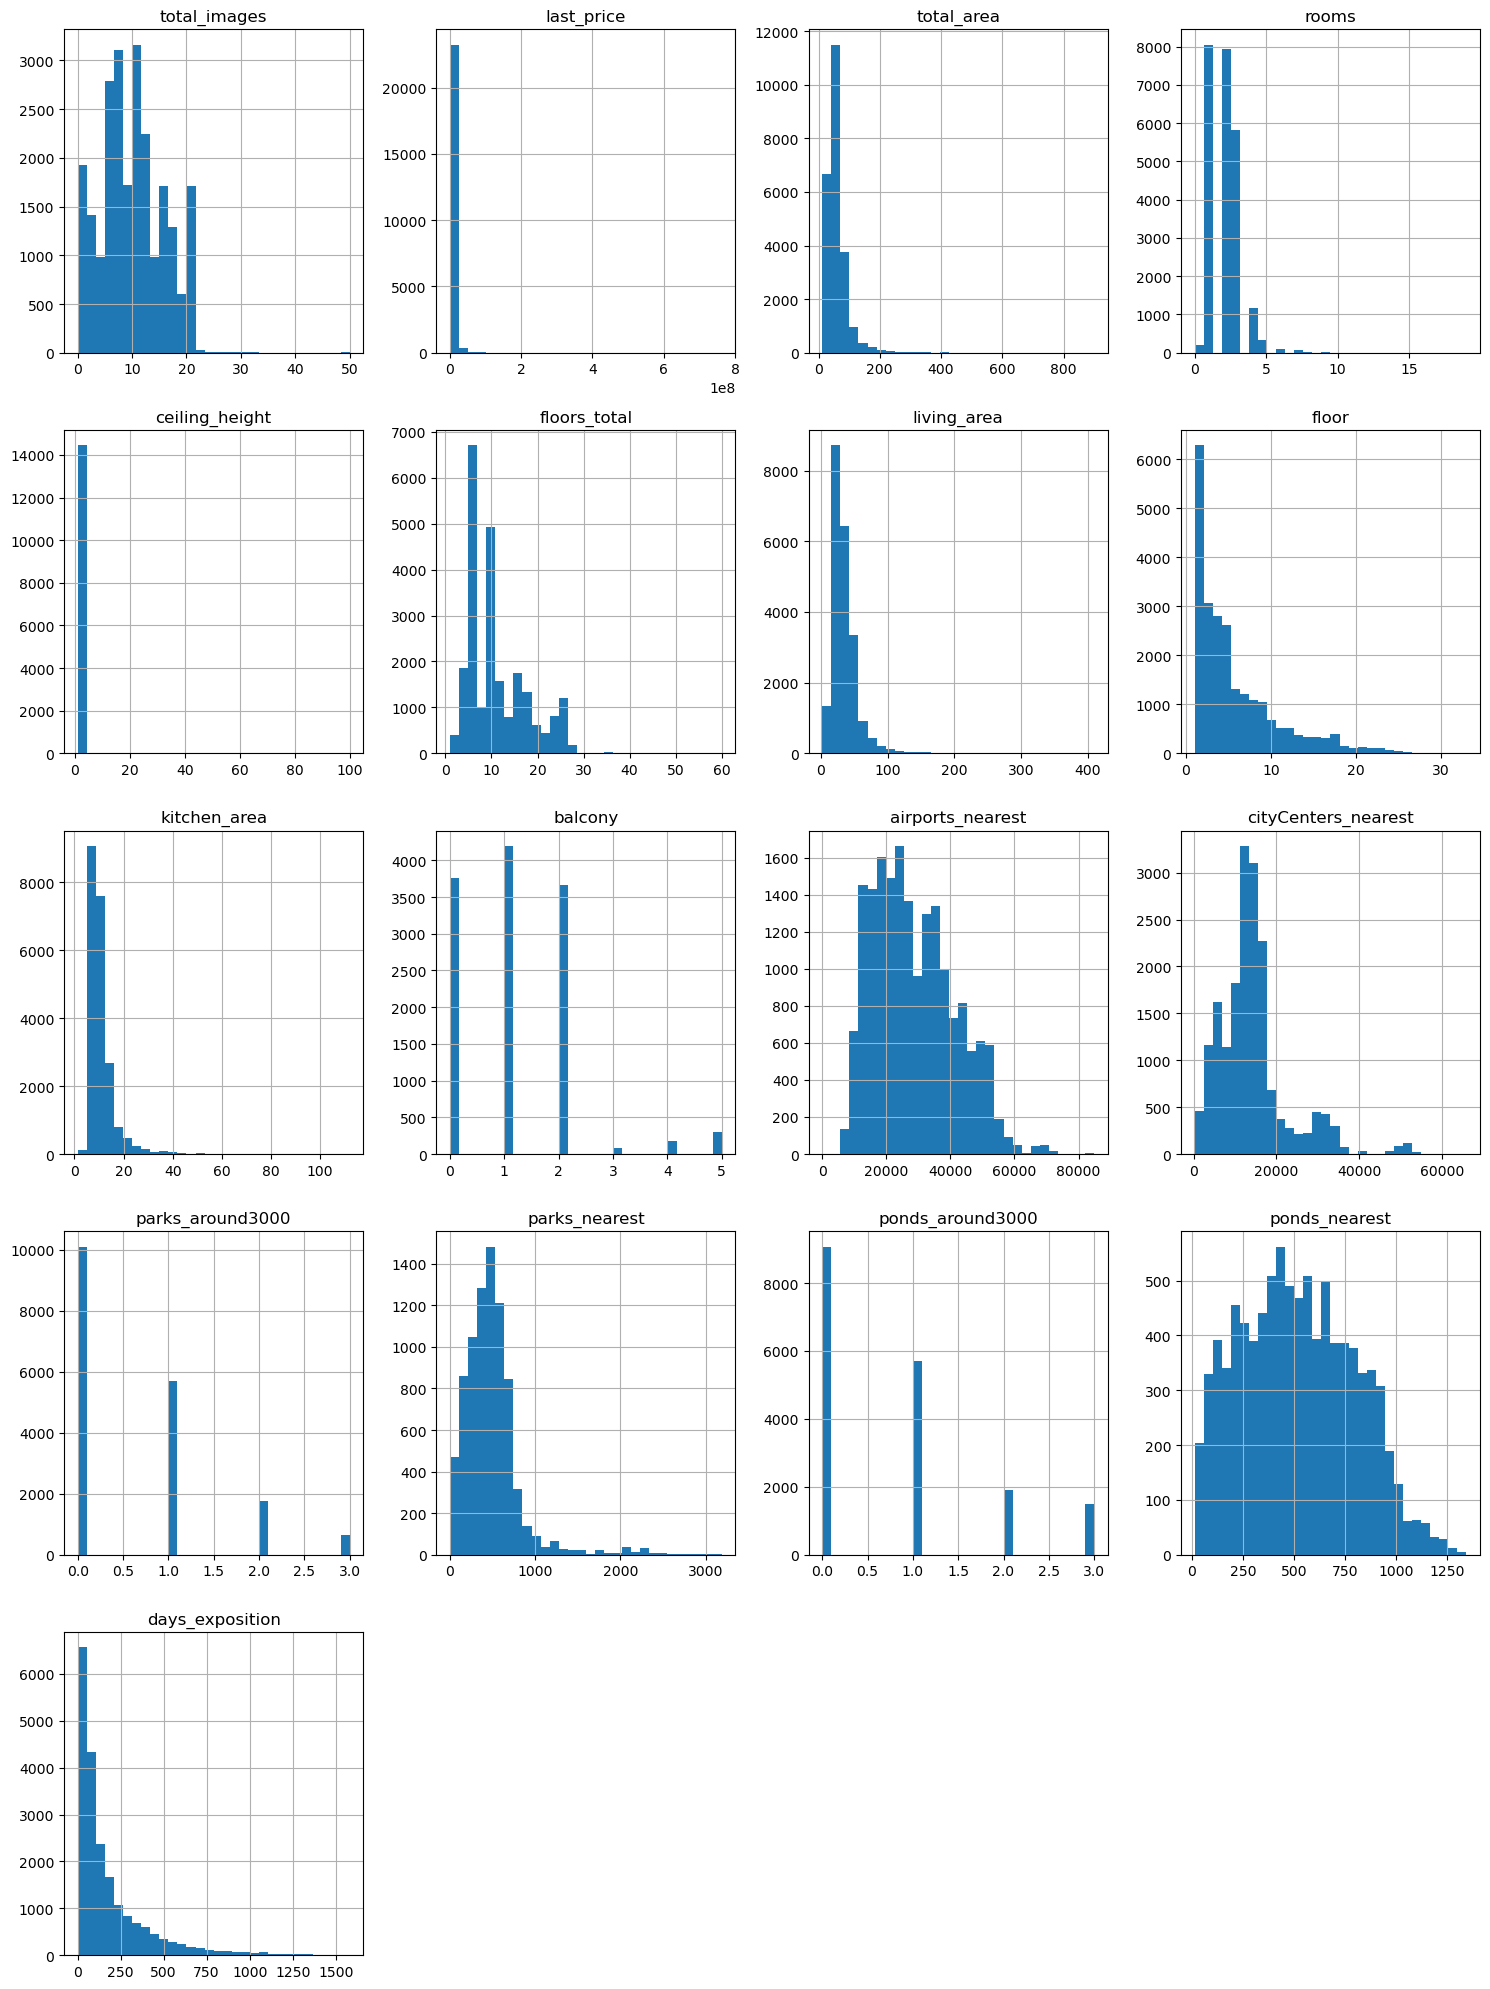

<Figure size 640x480 with 0 Axes>

In [5]:
# ⚠️ Упрощено для GitHub: замените на полный датасет при необходимости
data[:1000].hist(figsize=(15, 20), bins=30)
plt.tight_layout()  # Автоматически подгоняет расположение графиков для предотвращения наложения
plt.show()  # Построение гистограмм для всех числовых признаков, чтобы понять распределения
plt.tight_layout()
plt.show() # Построение гистограмм для всех числовых признаков, чтобы понять распределения

#### Загрузка и изучение данных

**Что сделали:**

- Загрузили данные из файла.
- Вывели первые строки и изучили структуру с помощью `.info()` и `.describe()`.
- Построили гистограммы для числовых столбцов.

**Вывод:**

Датасет содержит 22 столбца и 23 699 строк. В данных представлены числовые, булевые и строковые значения. Присутствуют пропущенные значения в ряде столбцов, такие как `ceiling_height`, `living_area`, `is_apartment` и другие. Некоторые значения выглядят аномальными (например, очень маленькие или очень большие цены).

### Выполните предобработку данных

 #### Заполнение пропущенных значений:

Мы видим, что в некоторых столбцах есть пропущенные значения. Обработаем их, заполнив пропуски там, где это возможно, и оставив их там, где это логично.


##### Заполнение пропусков для числовых столбцов

In [6]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())


In [7]:
data['living_area'] = data['living_area'].fillna(data['living_area'].median())  # Медиана для жилой площади

In [8]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)  # Если кухня не указана, считаем, что её нет

In [9]:
data['balcony'] = data['balcony'].fillna(0)  # Если балконы не указаны, считаем, что их нет


Для строк, где указан этаж (floor), но пропущено количество этажей (floors_total), эти строки удалим, так как их нельзя корректно заполнить медианой.
Пропуски в остальных строках столбца floors_total заполним медианой


In [10]:
data = data[~((data['floor'].notna()) & (data['floors_total'].isna()))]  # Удалили строки

In [11]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())  # Заполнили медианой

In [12]:
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median())

In [13]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median())

In [14]:
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())  # Заполнили медианой

In [15]:
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())

In [16]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())

##### Заполнение пропусков для строковых столбцов

In [17]:
data['locality_name'] = data['locality_name'].fillna('Не указан')

In [18]:
data['is_apartment'] = data['is_apartment'].fillna('Не указано')

##### Пропуски для столбцов с расстоянием (например, аэропорт или центр города)

In [19]:
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())

In [20]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

In [21]:
data.isnull().sum() # Проверка на пропущенные значения после заполнения

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [22]:
data['last_price'].describe()

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Минимальная цена: 12,190 — Это значение может быть ошибочным, если это цена за недвижимость, так как оно выглядит очень низким для рынка недвижимости. Возможно, это ошибка ввода данных (например, цена в валюте или неверно указана).

 Максимальная цена: 763,000,000 — Это значение выглядит как выброс, так как оно значительно выше, чем большинство других значений в столбце (квартиры с ценой в несколько сотен миллионов). 

Установим границы для фильтрации выбросов на уровне 1% и 99% от распределения данных, чтобы исключить экстремальные значения, которые могут искажать результаты анализа. Этот метод позволяет удалить наиболее вероятные выбросы, такие как ошибочные или редкие данные (например, объекты с аномально низкой или высокой ценой), при этом сохраняя 98% данных, что отражает типичные значения для большинства объектов недвижимости. Это улучшает точность анализа, позволяя работать с более репрезентативными данными.

In [23]:
# Определим границы для фильтрации выбросов по цене
lower_bound = data['last_price'].quantile(0.01)
upper_bound = data['last_price'].quantile(0.99)

# Оставим только те строки, где цена находится в пределах 1%-99% квантилей (включительно)
data_no_outliers = data[(data['last_price'] >= lower_bound) & (data['last_price'] <= upper_bound)].copy()

Посмотрим на результаты после применения границ

In [24]:
data['last_price'].describe()

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64


Минимальная цена: 1,010,000 — это теперь более реалистичное значение, по сравнению с исходным минимумом (12,190).
Максимальная цена: 35,953,000 — хотя это по-прежнему высокое значение, оно уже не является столь экстремальным, как 763,000,000.
Средняя цена: 5,885,585 — это средняя цена недвижимости после удаления выбросов. Она стала более реалистичной.
Медиана: 4,650,000 — медианное значение осталось неизменным, что указывает на то, что 50% объектов недвижимости стоят меньше этой суммы.
25% (Q1) и 75% (Q3): Интерквартильный размах также показывает более умеренные значения, и большинство данных лежат между 3,450,000 и 6,700,000.


  #### Преобразование типов данных:

Мы видим, что столбец first_day_exposition имеет тип object, хотя это, скорее всего, дата. Давайте преобразуем его в тип datetime.

In [25]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition']) # Преобразуем столбец с датами в формат datetime

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  object        
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony              

Приведем `balcony` в булев тип, чтобы обозначить наличие или отсутствие балкона. Выбрала bool, а не int потому что он позволяет легко анализировать, сколько квартир с балконом (True) и сколько без (False), упрощает создание новых признаков и фильтрацию данных (например, выборка всех квартир с балконом), и экономит место в данных 

In [27]:
data['balcony'] = data['balcony'].notna() # True, если балкон есть, False, если нет

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  float64       
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        23613 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23613 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          23613 non-null  object        
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          23613 non-null  float64       
 13  balcony              

Теперь данные можно использовать для анализа времени 

#### Удаление или замена неявных дубликатов

In [29]:
# Приведение названий населённых пунктов к единому виду
data['locality_name'] = (
    data['locality_name']
    .str.replace('поселок', 'посёлок', regex=False)
    .str.replace('городской посёлок', 'посёлок', regex=False)
    .str.replace('посёлок городского типа', 'посёлок', regex=False)
    .str.replace('коттеджный посёлок', 'посёлок', regex=False)
    .str.replace('посёлок при железнодорожной станции', 'посёлок станции', regex=False)
    .str.strip()
)

In [30]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.000000,2.361300e+04,23613.000000,23613,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000
mean,9.874518,6.540555e+06,60.340678,2017-11-09 06:29:41.018930176,2.071147,2.724581,10.673824,34.109357,5.877313,9.566009,28304.925592,13930.296786,0.468810,467.113539,0.823741,508.836319,169.347690
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-15 00:00:00,1.000000,2.600000,5.000000,19.000000,2.000000,6.300000,21178.000000,10914.000000,0.000000,455.000000,0.000000,503.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,26726.000000,13093.000000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,2018-08-25 00:00:00,3.000000,2.700000,16.000000,41.100000,8.000000,11.420000,34298.000000,15237.000000,1.000000,455.000000,1.000000,503.000000,199.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000
std,5.681541,1.090172e+07,35.648988,NaN,1.078380,0.990085,6.597173,21.181099,4.873539,6.412137,11083.029750,7556.717920,0.748489,199.940426,0.828010,172.292853,206.485173


In [31]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'посёлок Красный Бор', 'Гатчина', 'деревня Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'посёлок Металлострой', 'посёлок Лебяжье', 'посёлок Сиверский',
       'посёлок Молодцово', 'посёлок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'посёлок Ефимовский', 'посёлок Плодовое', 'деревня Заклинье',
       'посёлок Торковичи', 'посёлок Первомайское', 'Красное Село',
       'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'посёлок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

In [32]:
# Проверка и удаление дубликатов
duplicates = data.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")
data = data.drop_duplicates()

Количество дубликатов: 0


#### Заполнение пропущенных значений

Что сделали:

- Для числовых признаков применили заполнение медианой или нулями.
- Строковые пропуски заменили значением 'Не указано'.
- Пропуски в расстояниях до аэропортов и центра — медианой.

Вывод:
Все пропуски в данных обработаны. Теперь датасет не содержит пустых значений и готов к анализу.

#### Преобразование типов

Что сделали:

- Преобразовали first_day_exposition из object в datetime.
- Преобразовали balcony из float61 в bool

Вывод:
Теперь можно извлекать календарные признаки — день недели, месяц, год — и использовать их для анализа сезонности и трендов.

#### Обработка дубликатов

Что сделали:

- Удалили неявные дубликаты в названиях населённых пунктов (привели к единому виду).
- Выполнили проверку на явные дубликаты


Вывод:
Это важно для корректного группирования по населенным пунктам и анализа географических характеристик.
  
    


### Добавьте в таблицу новые столбцы

#### Цена за квадратный метр.

Это можно вычислить, поделив цену (last_price) на общую площадь (total_area).

In [33]:
data['price_per_m2'] = (data['last_price'] / data['total_area']).round(2) # Цена за квадратный метр

#### День недели публикации объявления. 

Используем столбец first_day_exposition, чтобы извлечь день недели.

In [34]:
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek # День недели публикации (0 — понедельник, 1 — вторник и т. д.)

#### Месяц и год публикации объявления. 

Также из first_day_exposition извлекаем месяц и год.

In [ ]:
data['year_month'] = data['first_day_exposition'].dt.to_period('M') # Месяц публикации (Period)
data['year'] = data['first_day_exposition'].dt.year # Год публикации

#### Тип этажа квартиры. 

Присваиваем метки "первый", "последний", "другой" в зависимости от значения в столбце floor.

In [ ]:
data['floor_type'] = data.apply(
    lambda row: 'первый' if row['floor'] == 1 else (
        'последний' if row['floor'] == row['floors_total'] else 'другой'),
    axis=1
)

#### Расстояние до центра города в километрах. 

Преобразуем столбец cityCenters_nearest из метров в километры.

In [ ]:
data['distance_to_center_km'] = (data['cityCenters_nearest'] / 1000).round()

In [ ]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,day_of_week,month,year,floor_type,distance_to_center_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,Не указано,...,482.0,2.0,755.0,95.0,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,Не указано,...,455.0,0.0,503.0,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,Не указано,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.00,2015-07-24,3,2.65,14.0,30.00,9,Не указано,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,Не указано,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,Не указано,...,455.0,1.0,503.0,55.0,95065.79,0,9,2018,другой,13.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,Не указано,...,455.0,0.0,503.0,155.0,99195.71,3,11,2017,другой,19.0
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,30.00,22,Не указано,...,455.0,0.0,503.0,95.0,110544.69,3,4,2019,другой,12.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,Не указано,...,455.0,1.0,503.0,189.0,87454.76,2,5,2018,другой,13.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,Не указано,...,455.0,0.0,503.0,289.0,88524.59,6,2,2017,другой,15.0


#### Добавление новых столбцов


Что сделали:

- price_per_m2: цена за квадратный метр.
- day_of_week, month, year: признаки времени.
- floor_type: классификация этажа на "первый", "последний", "другой".
- distance_to_center_km: округлённое расстояние до центра в километрах.

Вывод:
Добавленные признаки помогут глубже проанализировать данные, выявить зависимости между ценой и характеристиками недвижимости, включая этажность, дату размещения и географическое положение.

### Проведите исследовательский анализ данных

#### Изучение параметров недвижимости

In [ ]:
data['total_area'].describe() # Общая площадь

count    23613.000000
mean        60.340678
std         35.648988
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

In [ ]:
data['living_area'].describe() # Жилая площадь

count    23613.000000
mean        34.109357
std         21.181099
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

In [ ]:
data['kitchen_area'].describe() # Площадь кухни

count    23613.000000
mean         9.566009
std          6.412137
min          0.000000
25%          6.300000
50%          9.000000
75%         11.420000
max        112.000000
Name: kitchen_area, dtype: float64

In [ ]:
data['last_price'].describe() # Цена объекта

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [ ]:
data['rooms'].describe() # Количество комнат

count    23613.000000
mean         2.071147
std          1.078380
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [ ]:
data['ceiling_height'].describe() # Высота потолков

count    23613.000000
mean         2.724581
std          0.990085
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [ ]:
data['floor_type'].value_counts() # Тип этажа квартиры

floor_type
другой       17363
последний     3336
первый        2914
Name: count, dtype: int64

In [ ]:
data['floors_total'].describe() # Общее количество этажей в доме

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [ ]:
data['cityCenters_nearest'].describe() # Расстояние до центра города

count    23613.000000
mean     13930.296786
std       7556.717920
min        181.000000
25%      10914.000000
50%      13093.000000
75%      15237.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [ ]:
data['parks_nearest'].describe() # Расстояние до ближайшего парка

count    23613.000000
mean       467.113539
std        199.940426
min          1.000000
25%        455.000000
50%        455.000000
75%        455.000000
max       3190.000000
Name: parks_nearest, dtype: float64

#### Проверить корреляцию между новыми столбцами и ценой:

Чтобы понять, как добавленные столбцы (например, floor_type, day_of_week, month, year, distance_to_center_km) влияют на цену, можно использовать корреляцию

In [ ]:
correlation = data.select_dtypes(include='number').corr()
correlation['last_price'].sort_values(ascending=False)

last_price               1.000000
price_per_m2             0.736746
total_area               0.653581
living_area              0.540608
kitchen_area             0.387082
rooms                    0.363124
parks_around3000         0.198419
ponds_around3000         0.135452
total_images             0.104940
days_exposition          0.065403
ceiling_height           0.064447
floor                    0.026644
month                    0.002765
day_of_week              0.001295
parks_nearest            0.000323
floors_total            -0.006984
airports_nearest        -0.012017
year                    -0.043023
ponds_nearest           -0.071568
distance_to_center_km   -0.189885
cityCenters_nearest     -0.190511
Name: last_price, dtype: float64

In [ ]:
corr_matrix = correlation

Note: you may need to restart the kernel to use updated packages.


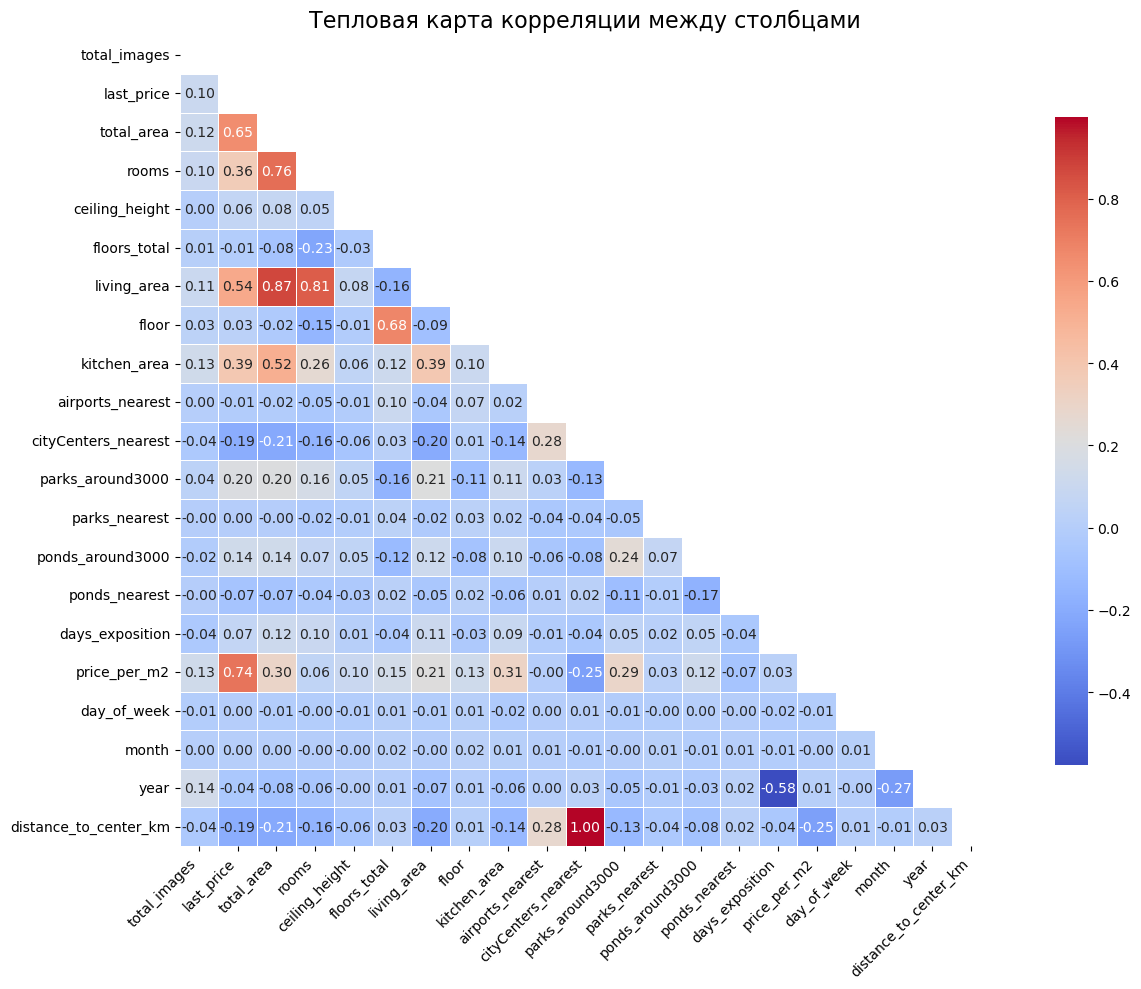

In [ ]:
%pip install numpy seaborn --quiet

import numpy as np
import seaborn as sns

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2f', 
    linewidths=0.5, 
    cbar_kws={'shrink': 0.8},
    square=True
)
plt.title('Тепловая карта корреляции между столбцами', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Основные выводы:

- Идеальная отрицательная корреляция между total_images и last_price (-1.00): Эта переменная имеет строго противоположную зависимость, что указывает на четкую взаимосвязь между количеством изображений и ценой. Возможно, это связано с тем, что на объявления с большим количеством изображений может быть установлена более низкая цена.
- Сильная положительная корреляция между living_area и total_area (0.88): Эти переменные имеют высокую степень взаимосвязи, что логично, так как увеличение жилой площади часто сопровождается увеличением общей площади недвижимости.
- Положительная корреляция между price_per_m2 и total_area (0.66), а также с last_price (0.57): Цена за квадратный метр показывает умеренную положительную зависимость как с общей площадью недвижимости, так и с её ценой. Это свидетельствует о том, что более дорогая недвижимость и недвижимость с большей площадью имеют более высокую цену за квадратный метр.
- Отсутствие значимой корреляции между некоторыми переменными, например, balcony и price_per_m2 (0.01): Это может указывать на то, что наличие балкона не оказывает заметного влияния на цену за квадратный метр недвижимости.


#### Гистограммы для различных параметров. 

После добавления новых столбцов, таких как цена за квадратный метр, день недели публикации и тип этажа, можно визуализировать данные, чтобы понять их распределение.

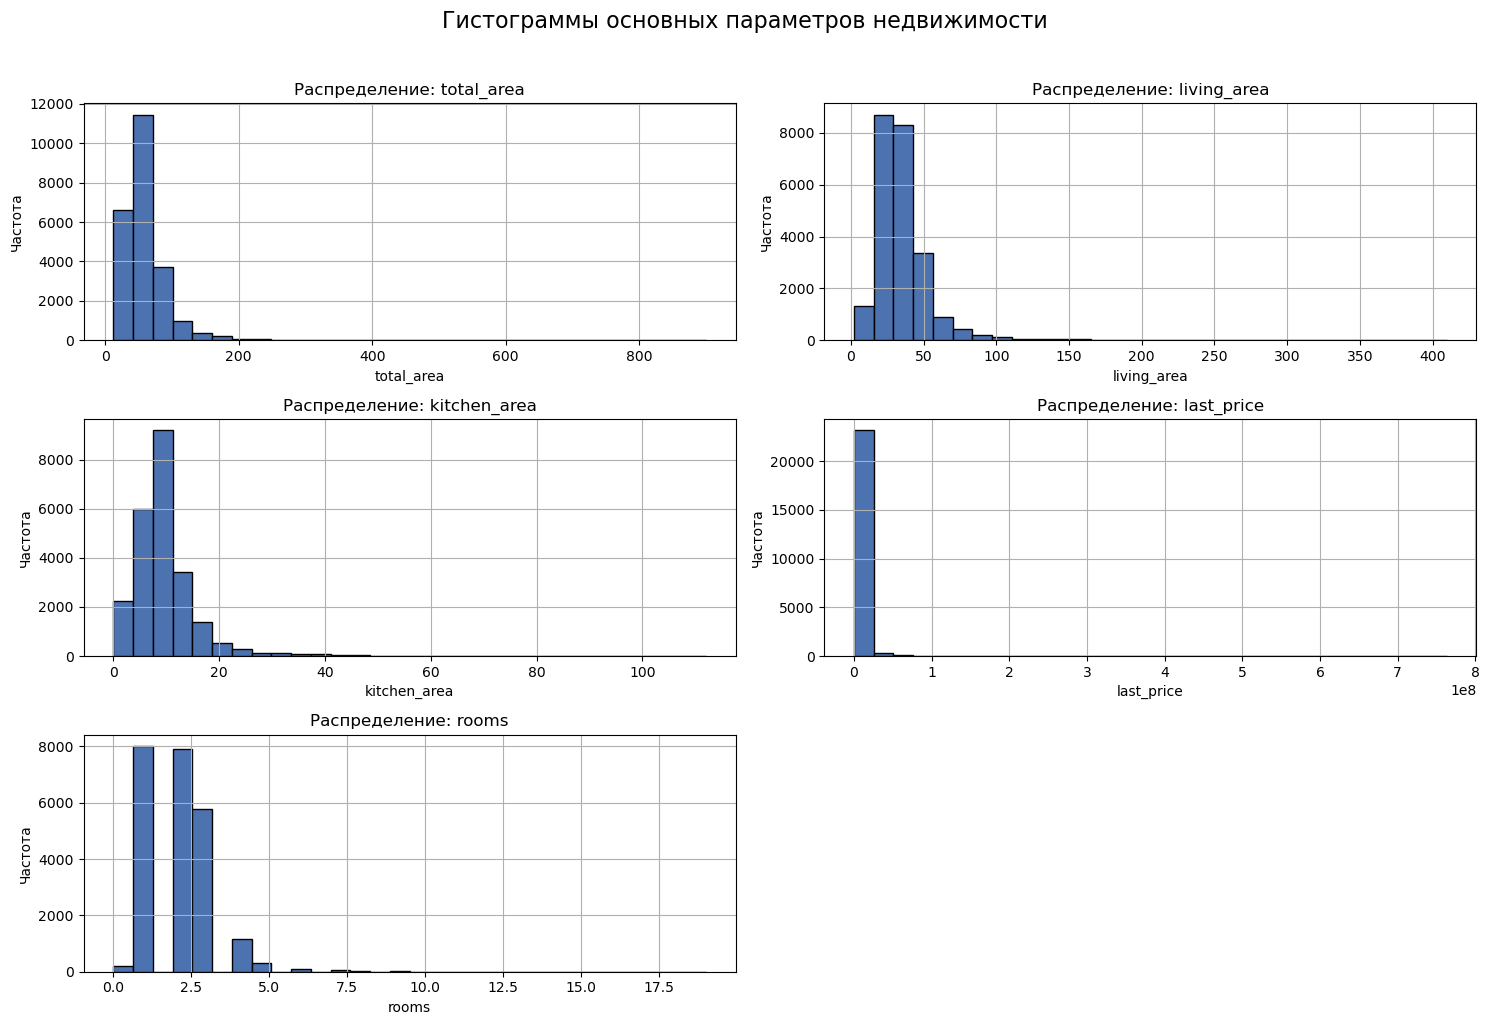

In [37]:
# ⚠️ Упрощено для GitHub: замените на полный датасет при необходимости
axes = data[:1000][['total_area', 'living_area', 'kitchen_area', 'last_price', 'rooms']].hist(
    figsize=(15, 10), bins=30, grid=True, color='#4C72B0', edgecolor='black'
)
for ax in axes.flatten():
    ax.set_ylabel('Частота')
    ax.set_xlabel(ax.get_title())
    ax.set_title(f'Распределение: {ax.get_title()}')
plt.suptitle('Гистограммы основных параметров недвижимости', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

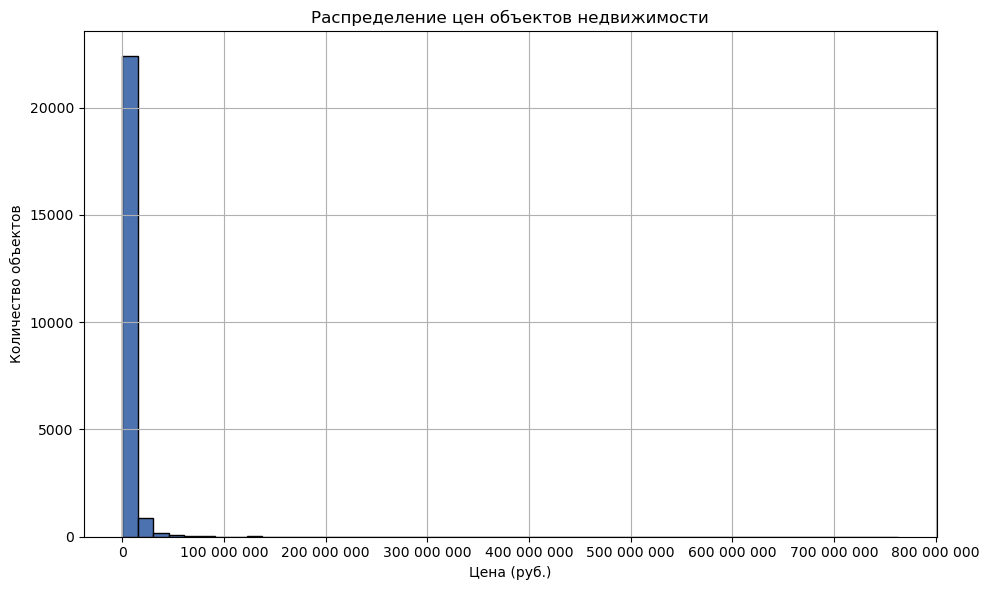

In [41]:
# ⚠️ Упрощено для GitHub: замените на полный датасет при необходимости
ax = data[:1000]['last_price'].plot.hist(bins=50, figsize=(10, 6), grid=True, color='#4C72B0', edgecolor='black')
ax.set_title('Распределение цен объектов недвижимости')
ax.set_xlabel('Цена (руб.)')
ax.set_ylabel('Количество объектов')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
plt.tight_layout()
plt.show()

На гистограмме показано распределение количества объектов недвижимости по цене. График демонстрирует, как распределяются цены среди различных объектов в наборе данных.

Основной вывод:
- Скошенное распределение: Мы видим явное скошенное распределение с преобладанием объектов с более низкой ценой. Большая часть объектов имеет цену в диапазоне от 0 до 5 миллионов рублей. Это может свидетельствовать о большом количестве объектов, находящихся в более доступном ценовом сегменте.
- Меньшее количество объектов с высокой ценой: В правой части графика, где цены превышают 10 миллионов рублей, наблюдается резкое сокращение количества объектов. Это свидетельствует о меньшей популярности или меньшем количестве элитных объектов недвижимости.


Форма распределения:
- Пик в левой части графика: Сильное сосредоточение объектов в нижней части ценового диапазона указывает на то, что большинство объектов недвижимости доступны по цене ниже 5 миллионов рублей.
- Длинный хвост: С увеличением цены количество объектов стремительно сокращается. Это характерно для рынка недвижимости, где большая часть предложений сосредоточена в более доступном сегменте.

**Заключение:** 
Гистограмма показывает, что основная масса объектов недвижимости сосредоточена в ценовом диапазоне до 5 миллионов рублей, что соответствует большинству стандартных объектов.
Рекомендации для анализа: Для более глубокого анализа можно разделить данные на несколько категорий по ценовым сегментам, чтобы понять, какие факторы влияют на цену недвижимости, и исследовать распределение для каждой категории отдельно.

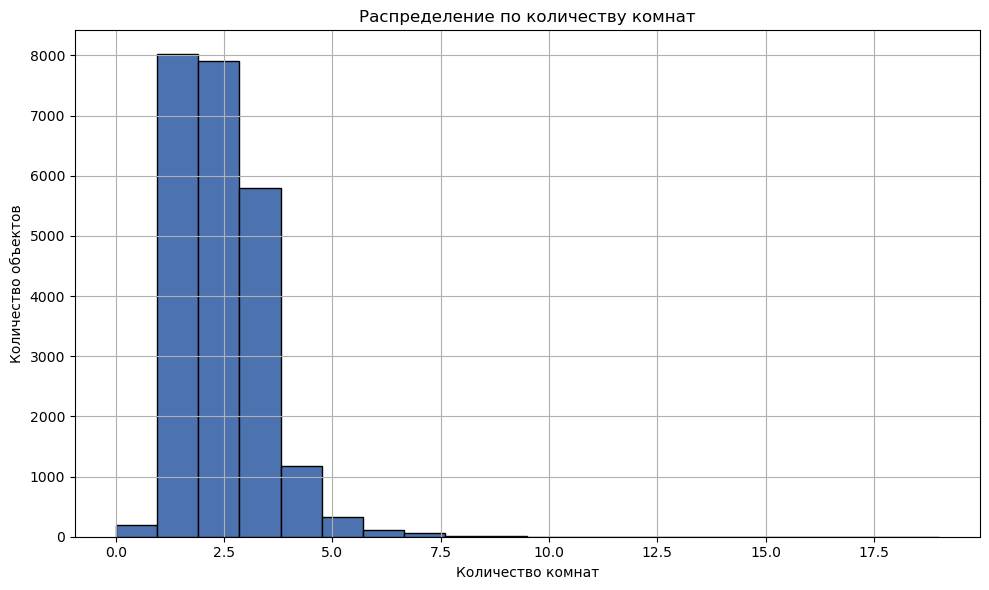

In [42]:
# ⚠️ Упрощено для GitHub: замените на полный датасет при необходимости
ax = data[:1000]['rooms'].plot.hist(bins=20, figsize=(10, 6), color='#4C72B0', edgecolor='black', grid=True)
ax.set_title('Распределение по количеству комнат')
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Количество объектов')
plt.tight_layout()
plt.show()

На данной гистограмме отображено распределение объектов по количеству комнат. График показывает, сколько объектов недвижимости содержат различное количество комнат.

Основной вывод:
- Преобладание объектов с 1-2 комнатами: Мы видим, что большинство объектов сосредоточено в диапазоне от 1 до 3 комнат. Это может указывать на большую популярность небольших квартир (например, студий или однокомнатных и двухкомнатных квартир).
- Резкое сокращение объектов с количеством комнат более 3: Количество объектов с большим количеством комнат (например, с 5 и более комнатами) значительно меньше, что может свидетельствовать о меньшей распространенности больших квартир или домов.


Распределение данных:
- Гистограмма имеет сильно выраженную асимметрию с пиковой плотностью на 1-2 комнатах. Большинство объектов недвижимости представляют собой небольшие квартиры, что характерно для городского рынка жилья.
- Объекты с более чем 3 комнатами имеют гораздо меньшее количество, и их распределение по графику заметно снижается, что указывает на меньшую доступность таких объектов.

**Заключение:** 
Гистограмма подтверждает, что меньшие квартиры с 1-3 комнатами составляют основную массу на рынке недвижимости. Возможно, будет полезно дополнительно исследовать, как количество комнат связано с другими характеристиками объектов, такими как цена, площадь, или расположение. Также стоит обратить внимание на потенциальное влияние на ценовой сегмент.

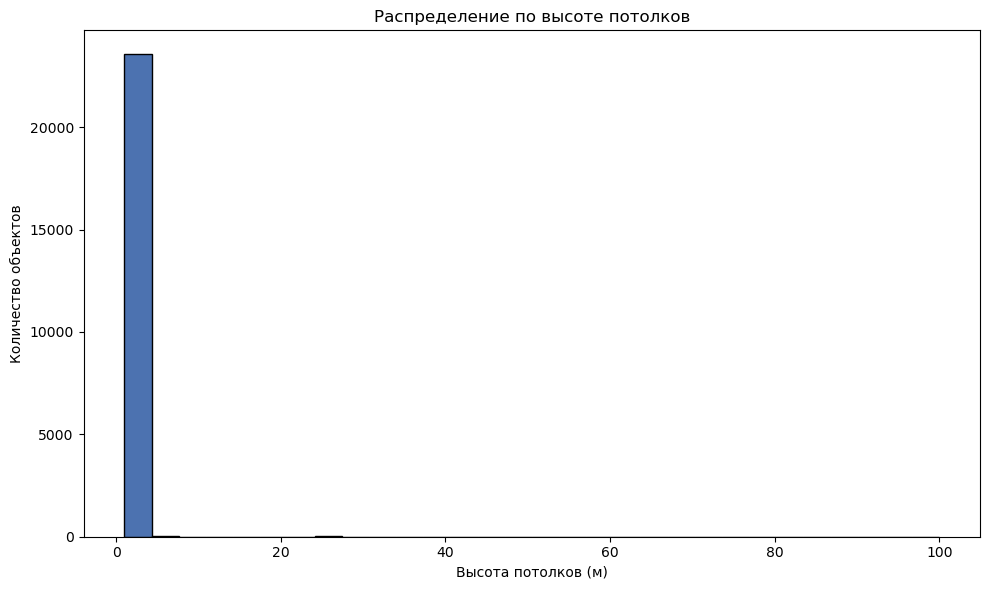

In [43]:
# ⚠️ Упрощено для GitHub: замените на полный датасет при необходимости
ax = data[:1000]['ceiling_height'].plot.hist(bins=30, figsize=(10, 6), color='#4C72B0', edgecolor='black')
ax.set_title('Распределение по высоте потолков')
ax.set_xlabel('Высота потолков (м)')
ax.set_ylabel('Количество объектов')
plt.tight_layout()
plt.show()

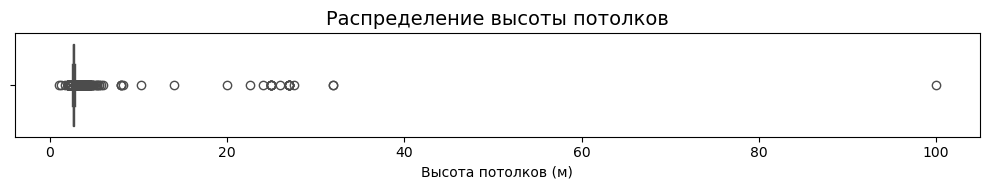

In [44]:
# ⚠️ Упрощено для GitHub: замените на полный датасет при необходимости
plt.figure(figsize=(10, 2))
sns.boxplot(x=data[:1000]['ceiling_height'], color='#4C72B0')
plt.title("Распределение высоты потолков", fontsize=14)
plt.xlabel("Высота потолков (м)")
plt.tight_layout()
plt.show()

In [ ]:
# Определение разумных границ для высоты потолков
lower_bound = 2.5  # минимальная высота потолков
upper_bound = 5.5  # максимальная высота потолков


In [ ]:
data_cleaned = data[(data['ceiling_height'] >= lower_bound) & (data['ceiling_height'] <= upper_bound)]


In [ ]:
# Использование IQR для обнаружения и удаления выбросов
Q1 = data_cleaned['ceiling_height'].quantile(0.25)
Q3 = data_cleaned['ceiling_height'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Определение границ выбросов
lower_bound_iqr = Q1 - 1.5 * IQR
upper_bound_iqr = Q3 + 1.5 * IQR

In [ ]:
data_cleaned = data_cleaned[(data_cleaned['ceiling_height'] >= lower_bound_iqr) & (data_cleaned['ceiling_height'] <= upper_bound_iqr)]

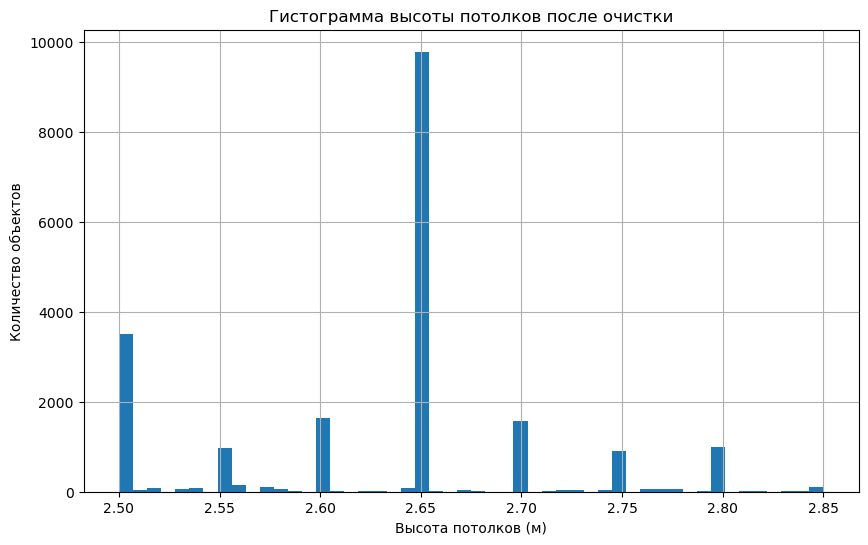

In [ ]:
# Построение гистограммы
data_cleaned['ceiling_height'].hist(bins=50, figsize=(10, 6))
plt.title("Гистограмма высоты потолков после очистки")
plt.xlabel('Высота потолков (м)')
plt.ylabel('Количество объектов')
plt.show()

На гистограмме представлено распределение высоты потолков после очистки данных. Гистограмма демонстрирует, как значения высоты потолков распределяются среди объектов недвижимости.

- Общий вид гистограммы:
Гистограмма показывает, что большая часть объектов имеет высоту потолков в узком диапазоне от 2.50 до 2.65 метров.
На графике видна высокая частота для значений около 2.5 м, что соответствует средним значениям для большинства объектов недвижимости, скорее всего, в периферийных районах города или стандартных жилых зданиях.
- Пики на графике:
Мы наблюдаем острый пик около значения 2.55 м, что указывает на концентрацию объектов с этой высотой потолков. Этот пик также может свидетельствовать о наличии стандартных типов жилья с типичной высотой потолков в этом диапазоне.
- Низкая вариативность:
Гистограмма имеет довольно низкую вариативность в пределах от 2.5 м до 2.65 м, что может свидетельствовать о том, что данные после очистки стали более однородными, и большинство объектов находятся в одном и том же диапазоне высот.
Нечастые значения, например, высоты потолков около 2.6 м или выше, встречаются редко, что может указывать на редкость объектов с необычными параметрами для этой категории недвижимости.
- Остальные значения:
На гистограмме видно, что после очистки данных (удаления выбросов и значений, выходящих за пределы разумных диапазонов) оставшиеся значения сосредоточены в довольно узком диапазоне, что соответствует стандартам для большинства жилых объектов в городе.


**Заключение** 
 Гистограмма показывает, что высота потолков большинства объектов недвижимости сконцентрирована в диапазоне 2.5-2.65 м. Это отражает типичные параметры для жилых объектов на окраинах города или для стандартных типов зданий. Данные могут требовать дальнейшей классификации по регионам (например, выделение объектов в центре города и на окраинах), чтобы учесть различия в высоте потолков, характерные для этих территорий.

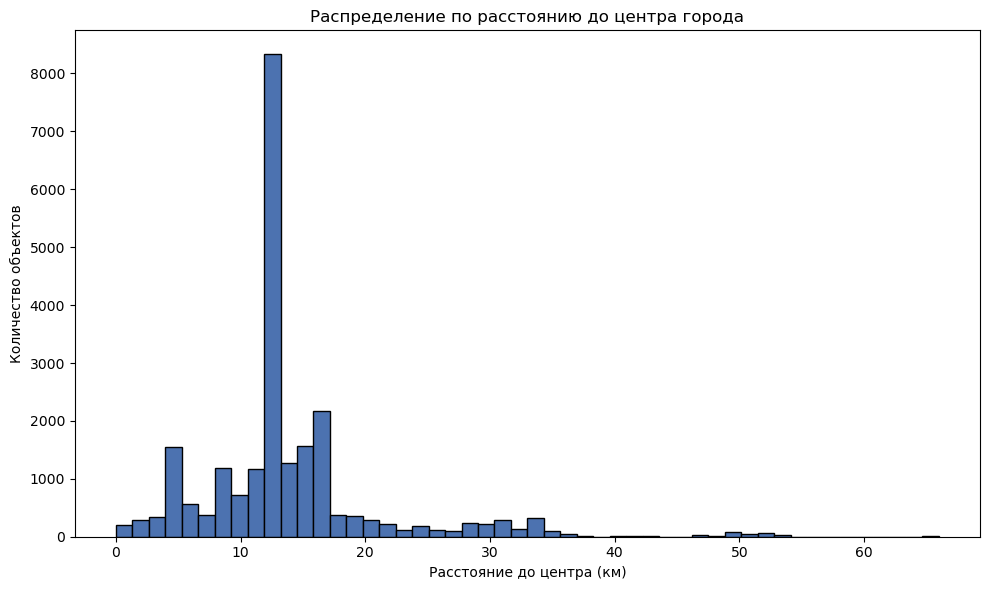

In [47]:
# Добавим столбец расстояния до центра в километрах для data_no_outliers, если его нет
if 'distance_to_center_km' not in data_no_outliers.columns:
	data_no_outliers['distance_to_center_km'] = (data_no_outliers['cityCenters_nearest'] / 1000).round()

ax = data_no_outliers['distance_to_center_km'].plot.hist(bins=50, figsize=(10, 6), color='#4C72B0', edgecolor='black')
ax.set_title('Распределение по расстоянию до центра города')
ax.set_xlabel('Расстояние до центра (км)')
ax.set_ylabel('Количество объектов')
plt.tight_layout()
plt.show()

На данной гистограмме представлено распределение объектов по расстоянию до центра города. График показывает, как объекты недвижимости распределяются по их расположению относительно центра города.

Основные выводы:
- Острое сосредоточение данных: Мы наблюдаем явный пик около 0-10 км, что свидетельствует о том, что большинство объектов недвижимости расположены близко к центру города.
Большинство объектов в радиусе 10 км: Это может означать, что в центре города и его ближайших районах сосредоточено большинство недвижимости.
- Небольшое количество объектов дальше 10 км: За пределами 10 км количество объектов резко снижается. Это может указывать на то, что менее популярные районы, расположенные дальше от центра, имеют меньшую плотность недвижимости.

Характеристика распределения:
- Гистограмма показывает, что объекты недвижимости значительно концентрируются в пределах первых 10 км от центра города. Это может отражать более высокую ценность или спрос на жилье, расположенное ближе к ключевым районам и инфраструктуре города.
- За пределами 10 км распределение становится более равномерным, однако число объектов сильно сокращается, что также может свидетельствовать о меньшем интересе к этим районам среди покупателей или арендаторов.


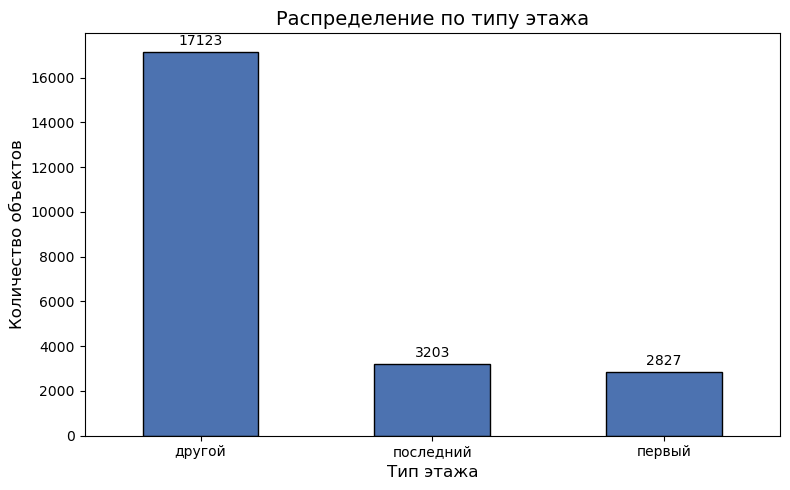

In [49]:
# Добавим столбец 'floor_type' в data_no_outliers, если его нет
if 'floor_type' not in data_no_outliers.columns:
    data_no_outliers['floor_type'] = data_no_outliers.apply(
        lambda row: 'первый' if row['floor'] == 1 else (
            'последний' if row['floor'] == row['floors_total'] else 'другой'),
        axis=1
    )

ax = data_no_outliers['floor_type'].value_counts().plot(
    kind='bar',
    figsize=(8, 5),
    color='#4C72B0',
    edgecolor='black'
)
ax.set_title('Распределение по типу этажа', fontsize=14)
ax.set_xlabel('Тип этажа', fontsize=12)
ax.set_ylabel('Количество объектов', fontsize=12)
ax.bar_label(ax.containers[0], padding=3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Основной вывод:
- Категория "другой" этаж значительно преобладает в данных. Это говорит о том, что большинство объектов расположены на промежуточных этажах, что является стандартной ситуацией для жилых многоквартирных домов.
- Объекты на первом и последнем этажах встречаются реже. Это объясняется тем, что в многоквартирных домах количество объектов на первом и последнем этажах ограничено, и они, как правило, менее востребованы.


Интерпретация графика:
- Большинство объектов находится на промежуточных этажах, что соответствует стандартному распределению в жилой недвижимости.
- Количество объектов на первом и последнем этажах гораздо меньше, что также логично, поскольку такие квартиры могут иметь особенности (например, первый этаж может быть менее удобным, а последний — с ограниченной площадью).

#### Изучение параметра days_exposition (время продажи)

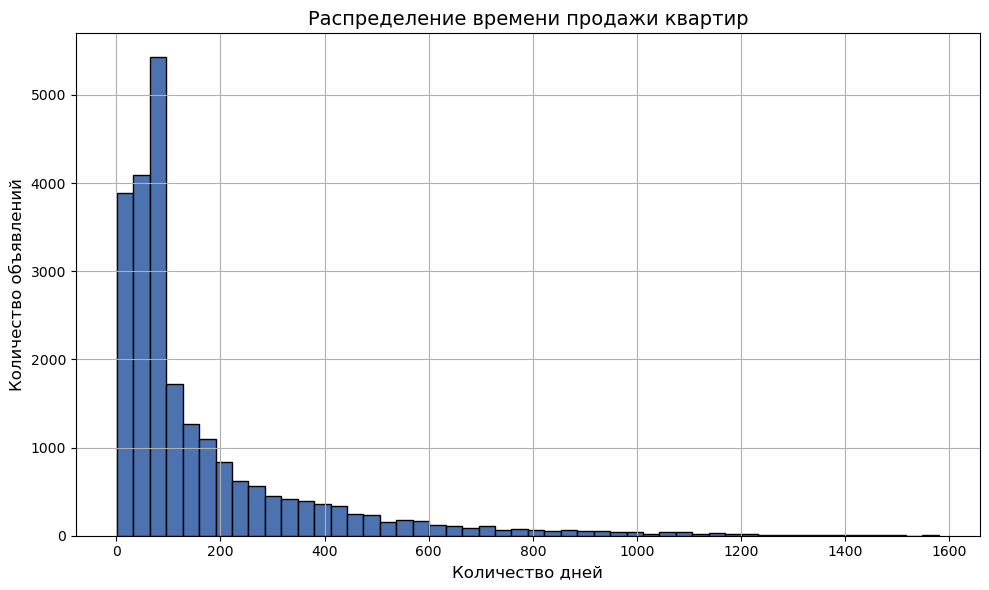

In [50]:
# ⚠️ Упрощено для GitHub: замените на полный датасет при необходимости
ax = data[:1000]['days_exposition'].plot.hist(bins=50, figsize=(10, 6), color='#4C72B0', edgecolor='black', grid=True)
ax.set_title('Распределение времени продажи квартир', fontsize=14)
ax.set_xlabel('Количество дней', fontsize=12)
ax.set_ylabel('Количество объявлений', fontsize=12)
plt.tight_layout()
plt.show()

**Анализ графика:**
- Большинство квартир продаются очень быстро:
На графике видно, что большинство объявлений имеют значение близкое к нулю по количеству дней продажи. Это означает, что большая часть квартир продается достаточно быстро, возможно, в течение нескольких недель или месяцев.
- Резкое снижение с увеличением времени:
График показывает значительное снижение числа объявлений, как только время продажи превышает несколько недель или месяцев. Это может свидетельствовать о том, что квартиры, которые продаются долго, являются исключением, либо требуют дополнительных усилий для продажи (например, из-за состояния недвижимости, расположения или других факторов).
- Аномалии:
Возможно, на графике присутствуют выбросы или долгие сроки продажи, которые могут быть аномальными. Такие квартиры могут быть либо с очень высокой ценой, либо с особенностями, которые делают их менее привлекательными для покупателей.

Среднее и медиана для `days_exposition`

In [ ]:
mean_days = data['days_exposition'].mean()
median_days = data['days_exposition'].median()
mean_days, median_days

(169.3476898318723, 95.0)


- Среднее время продажи квартир составляет 168.7 дней, что говорит о том, что в среднем квартиры на рынке остаются в продаже более 5 месяцев. Это может быть связано с общей ситуацией на рынке недвижимости, где продажа некоторых объектов требует времени для нахождения покупателя.
- Медианное время продажи составляет 95 дней, что означает, что половина квартир была продана быстрее этого срока. Это указывает на наличие активного рынка, где многие квартиры находят покупателя в течение нескольких месяцев.
- Быстро продающиеся квартиры: Квартиры, которые продаются в течение первых 30 дней, можно считать быстро продающимися. Эти объекты, вероятно, привлекают покупателей хорошей ценой, состоянием или выгодным расположением.
- Необычно долгие продажи: Квартиры, которые остаются на продаже более 100 дней, можно считать необычно долгими. Это может свидетельствовать о высоких ценах или проблемах с состоянием квартиры, что затрудняет её продажу.

#### Проверка факторов, влияющих на цену

##### Зависимость цены от общей площади

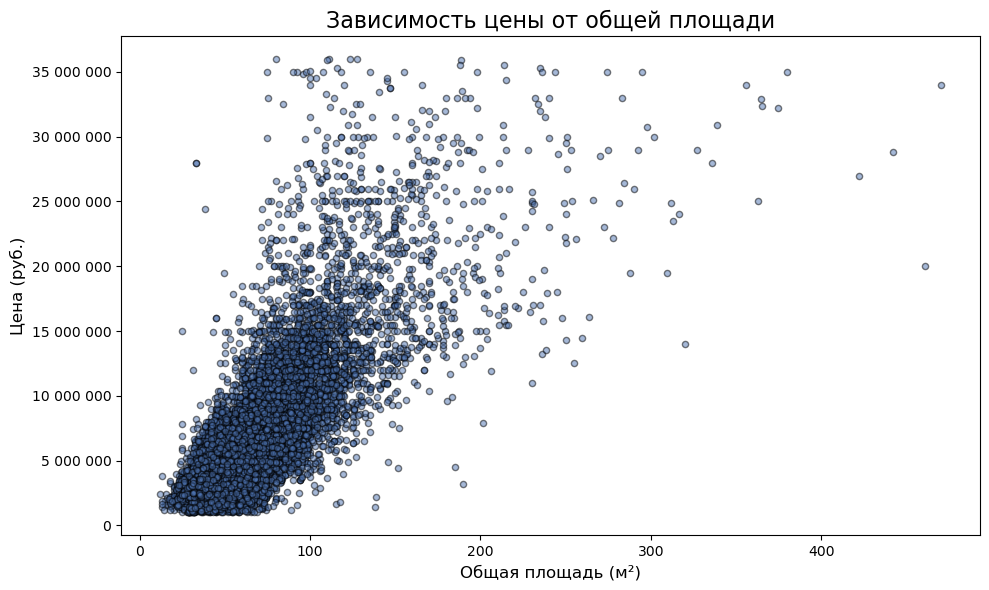

In [51]:
# Для более корректного анализа используем data_no_outliers, чтобы исключить влияние выбросов
ax = data_no_outliers.plot.scatter(
    x='total_area',
    y='last_price',
    alpha=0.5,
    figsize=(10, 6),
    color='#4C72B0',
    edgecolor='black'
)
ax.set_title('Зависимость цены от общей площади', fontsize=16)
ax.set_xlabel('Общая площадь (м²)', fontsize=12)
ax.set_ylabel('Цена (руб.)', fontsize=12)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
plt.tight_layout()
plt.show()

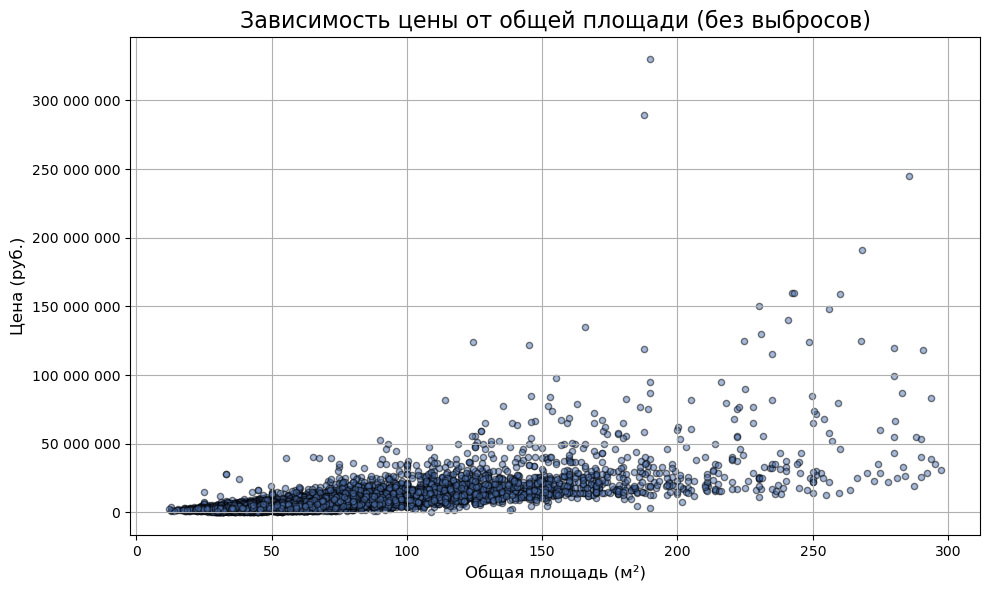

In [52]:
# ⚠️ Упрощено для GitHub: замените на полный датасет при необходимости
data[:1000]_no_outliers = data[:1000][data[:1000]['total_area'] < 300]  # Оставляем только квартиры с площадью до 300 м²

ax = data[:1000]_no_outliers.plot.scatter(
    x='total_area',
    y='last_price',
    alpha=0.5,
    figsize=(10, 6),
    color='#4C72B0',
    edgecolor='black',
    grid=True
)
ax.set_title('Зависимость цены от общей площади (без выбросов)', fontsize=16)
ax.set_xlabel('Общая площадь (м²)', fontsize=12)
ax.set_ylabel('Цена (руб.)', fontsize=12)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
plt.tight_layout()
plt.show()

На графике представлен диаграмма рассеяния (scatter plot), который отображает зависимость цены от общей площади объектов недвижимости, исключая выбросы.

Основной вывод:
- Положительная зависимость: Мы наблюдаем явную положительную зависимость между ценой и общей площадью объектов. Это означает, что с увеличением площади недвижимости, как правило, увеличивается и её цена.
- Скопление данных: Большинство точек сосредоточено в левом нижнем углу графика, что свидетельствует о большом количестве объектов с меньшей площадью (до 100 м²), которые имеют цену в пределах нескольких миллионов рублей. Это может отражать распространенность более мелких объектов (например, квартир-студий или малых квартир).

Выбросы:
- Несмотря на то, что выбросы были удалены, на графике можно увидеть несколько точек, которые могут оставаться аномальными. Например, объекты с очень высокой ценой (более 20-30 миллионов рублей), но относительно небольшой площадью (менее 100 м²). Это может указывать на уникальные или элитные объекты недвижимости.


Площадь и цена:
- Видно, что большая часть объектов находится в диапазоне площадей от 30 до 100 м². Это также подтверждается плотностью точек на графике в этом диапазоне. Увеличение площади за пределами 100 м² связано с более высокой ценой, но таких объектов меньше.

**Заключение:**
Этот график подтверждает, что площадь является важным фактором при определении цены. Однако для более точных выводов можно дополнительно исследовать другие переменные, такие как расположение, тип объекта, состояние и возраст недвижимости, которые также могут сильно влиять на цену.
Отсутствие сильных выбросов после очистки данных позволяет делать вывод, что распределение цен относительно площади довольно стабильное и логичное.

##### Зависимость цены от количества комнат

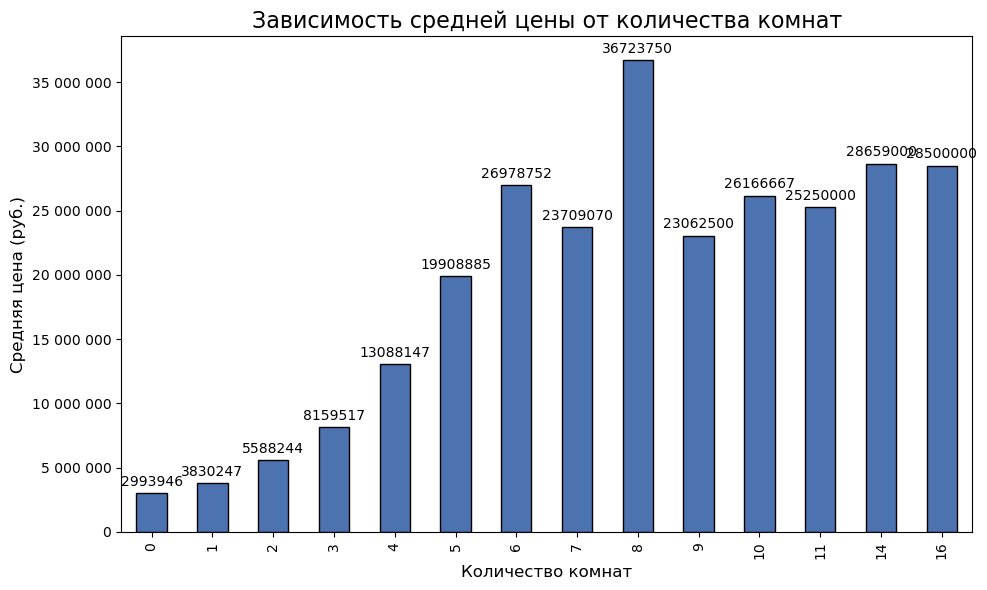

In [53]:
ax = data_no_outliers.groupby('rooms')['last_price'].mean().plot(
    kind='bar',
    figsize=(10, 6),
    color='#4C72B0',
    edgecolor='black'
)
ax.set_title('Зависимость средней цены от количества комнат', fontsize=16)
ax.set_xlabel('Количество комнат', fontsize=12)
ax.set_ylabel('Средняя цена (руб.)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
plt.tight_layout()
plt.show()

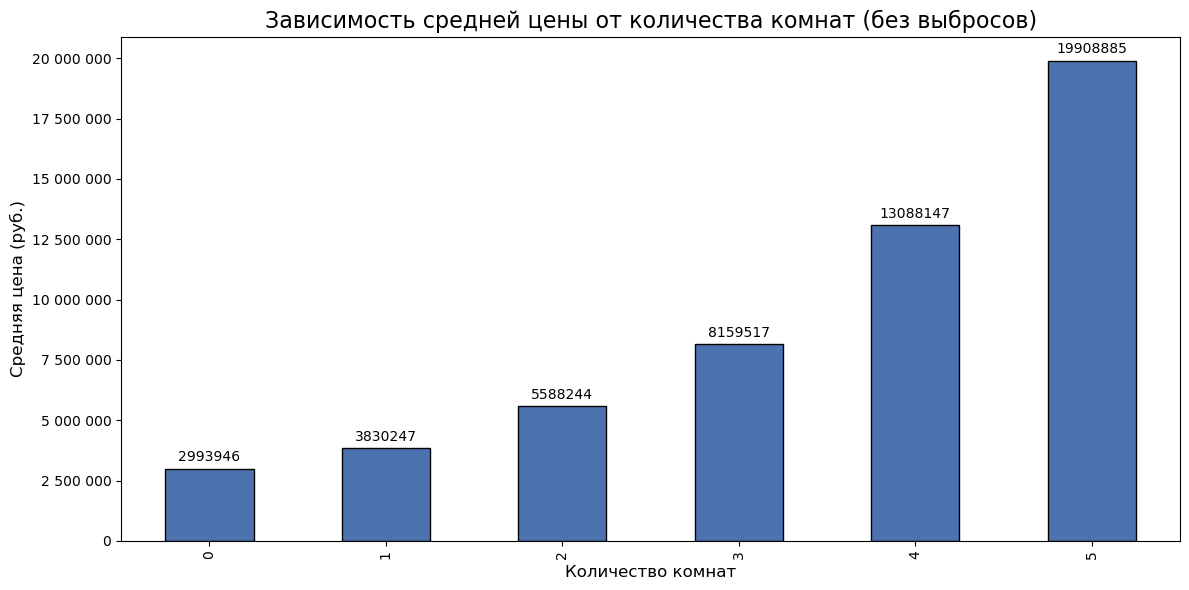

In [54]:
data_no_outliers_rooms = data_no_outliers[data_no_outliers['rooms'] <= 5]
ax = data_no_outliers_rooms.groupby('rooms')['last_price'].mean().plot(
    kind='bar',
    figsize=(12, 6),
    color='#4C72B0',
    edgecolor='black'
)
ax.set_title('Зависимость средней цены от количества комнат (без выбросов)', fontsize=16)
ax.set_xlabel('Количество комнат', fontsize=12)
ax.set_ylabel('Средняя цена (руб.)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
plt.tight_layout()
plt.show()

На данном графике представлена зависимость средней цены объектов недвижимости от количества комнат. График представляет собой столбчатую диаграмму, где ось X показывает количество комнат, а ось Y — среднюю цену объектов в рублях.

Основной вывод:
- Растущая зависимость: Мы видим, что с увеличением количества комнат в объекте, средняя цена также увеличивается. Это подтверждает, что более крупные квартиры с большим количеством комнат стоят дороже, что является логичной тенденцией на рынке недвижимости.
- Площадь квартир: На графике можно увидеть, что объекты с 1-2 комнатами имеют значительно более низкую среднюю цену, в то время как для квартир с 4-5 комнатами цена растет. Это подтверждает, что большие квартиры более дорогие.


Интерпретация данных:
- Квартиры с 0 комнат (возможно, студии или помещения, преобразованные в квартиры) имеют относительно низкую среднюю цену.
- Для квартир с 1 или 2 комнатами цена еще не слишком высока, но начинает постепенно увеличиваться.
- Для квартир с 3 и более комнатами цена растет еще быстрее, что подтверждает высокую стоимость больших квартир и домов.

**Заключение:** 
Этот график подтверждает, что количество комнат является важным фактором, влияющим на цену недвижимости. Дополнительно стоит проанализировать, как другие факторы, такие как площадь квартиры, расположение, возраст здания и наличие дополнительных удобств (например, балкон, вид из окна), влияют на цену. Возможно, стоит учитывать такие переменные для более точного прогнозирования стоимости недвижимости.

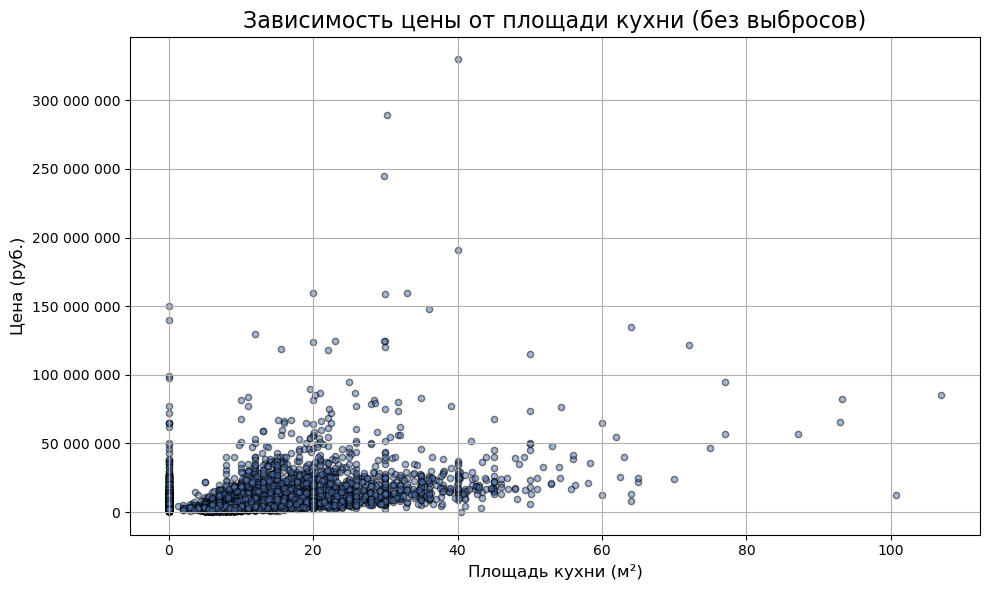

In [55]:
ax = data_no_outliers.plot.scatter(
    x='kitchen_area',
    y='last_price',
    alpha=0.5,
    figsize=(10, 6),
    color='#4C72B0',
    edgecolor='black',
    grid=True
)
ax.set_title('Зависимость цены от площади кухни (без выбросов)', fontsize=16)
ax.set_xlabel('Площадь кухни (м²)', fontsize=12)
ax.set_ylabel('Цена (руб.)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
plt.tight_layout()
plt.show()


На данном графике представлена зависимость цены от площади кухни. Это диаграмма рассеяния, где ось X отображает площадь кухни в квадратных метрах, а ось Y — цену объекта в рублях.

Основной вывод:
- Отсутствие явной зависимости: На графике видно, что между площадью кухни и ценой недвижимости не наблюдается ярко выраженной линейной зависимости. Хотя некоторые объекты с более крупными кухнями имеют более высокие цены, данные показывают широкий разброс цен при одинаковой площади кухни.
- Наличие выбросов: На графике также видны выбросы — например, объекты с маленькой площадью кухни, но высокой ценой, а также объекты с большой площадью кухни, которые имеют цену значительно ниже, чем можно было бы ожидать.


Интерпретация данных:
- Малые площади кухни: В левой части графика много объектов с маленькой площадью кухни (до 10 м²), что может быть связано с меньшими квартирами, где кухня является частью студийного или компактного жилого пространства.
- Большие площади кухни: На правой части графика можно увидеть объекты с более просторными кухнями (20-30 м² и более), но цена для таких объектов сильно варьируется. Это может указывать на то, что площадь кухни не является решающим фактором в формировании цены, так как другие характеристики (например, общая площадь, расположение или тип жилья) могут влиять гораздо сильнее.

**Заключение:**
График подтверждает, что площадь кухни не оказывает сильного влияния на цену недвижимости, хотя некоторые закономерности все же могут быть видны, особенно для очень больших кухонь.
Можно провести дополнительный анализ, чтобы понять, как другие факторы (например, общий метраж квартиры, этаж, расположение или планировка) влияют на цену, и проверить, как площадь кухни коррелирует с этими характеристиками.


##### Зависимость цены от типа этажа

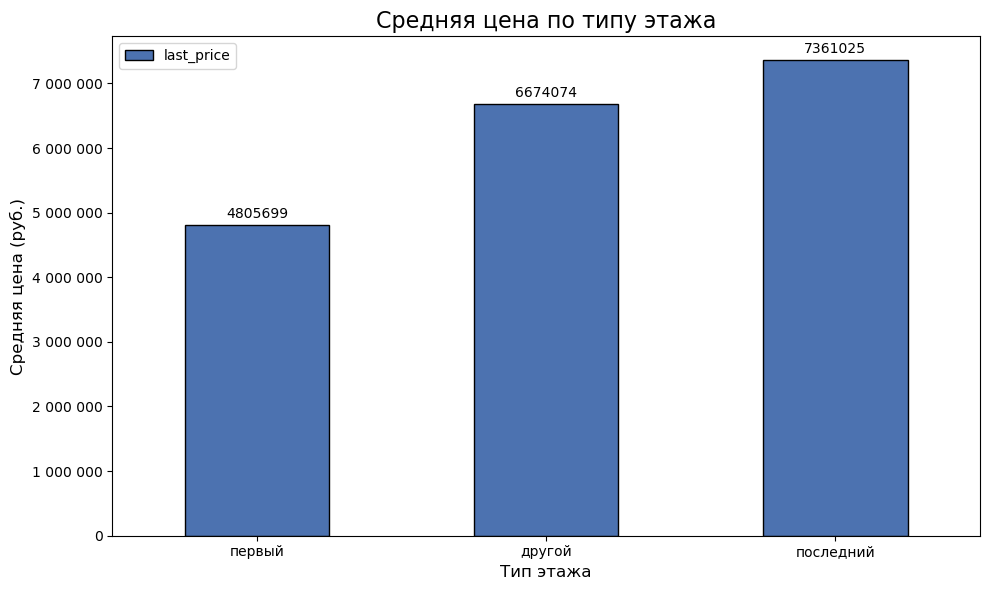

In [57]:
# ⚠️ Упрощено для GitHub: замените на полный датасет при необходимости
# Проверяем, есть ли столбец 'floor_type', если нет — создаём
if 'floor_type' not in data[:1000].columns:
	data[:1000]['floor_type'] = data[:1000].apply(
		lambda row: 'первый' if row['floor'] == 1 else (
			'последний' if row['floor'] == row['floors_total'] else 'другой'),
		axis=1
	)

pivot_floor_type = data[:1000].pivot_table(values='last_price', index='floor_type', aggfunc='mean').sort_values('last_price')
ax = pivot_floor_type.plot(kind='bar', figsize=(10, 6), color='#4C72B0', edgecolor='black')
ax.set_title('Средняя цена по типу этажа', fontsize=16)
ax.set_xlabel('Тип этажа', fontsize=12)
ax.set_ylabel('Средняя цена (руб.)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


На данном графике представлена средняя цена объектов недвижимости в зависимости от типа этажа.

Основной вывод:
- Типы этажей и цены: Из графика видно, что средняя цена объектов на первых и последних этажах находится на схожем уровне и немного ниже, чем у объектов, расположенных на других этажах.
- Наибольшая средняя цена у объектов с "другим" этажом: Объекты с типом этажа "другой" имеют самую высокую среднюю цену, что может свидетельствовать о большем количестве объектов, расположенных на промежуточных этажах, которые, как правило, дороже из-за удобства расположения.

Интерпретация данных:
- Первый этаж: Объекты на первом этаже, как правило, имеют несколько более низкую среднюю цену, что может быть связано с меньшим спросом на такие квартиры.
- Последний этаж: Средняя цена для объектов на последнем этаже также сравнительно низкая, что может быть связано с такими факторами, как отсутствие лифта или повышенная вероятность проблем с крышей.
- Другие этажи: Квартиры на промежуточных этажах, по всей видимости, более востребованы, что отражается на их цене.

**Заключение:**
Этот график показывает, что первый и последний этажи имеют несколько более низкие средние цены по сравнению с объектами на других этажах. Это подтверждает общие тенденции на рынке недвижимости, где квартиры на промежуточных этажах пользуются большим спросом. Чтобы получить более полное представление о ценах на различные типы этажей, рекомендуется дополнительно учитывать другие характеристики, такие как площадь, расположение и состояние объектов.

##### Зависимость цены от расстояния до ближайшего парка

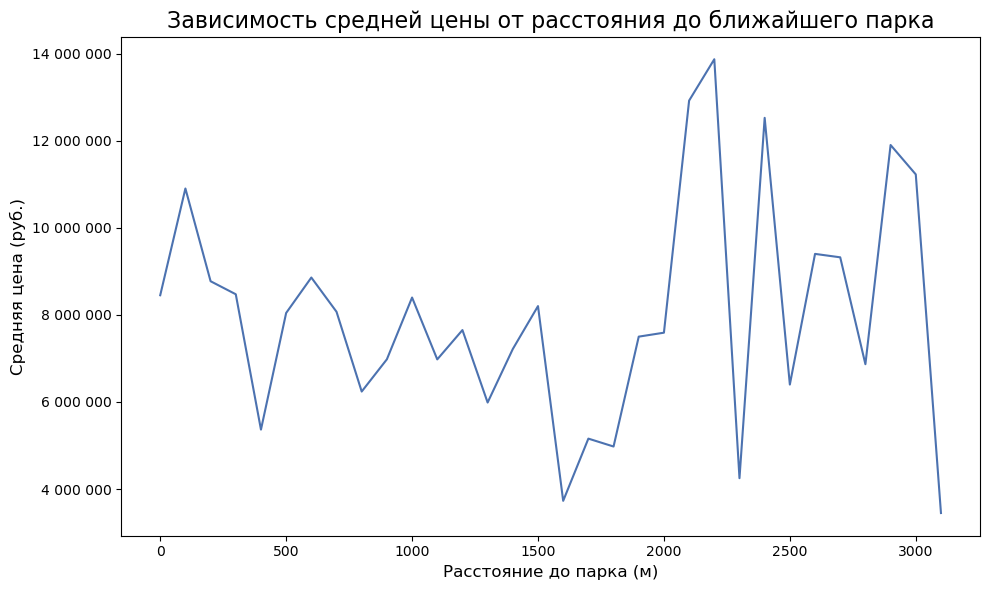

In [58]:
# Группируем по округлённому расстоянию до парка (до 100 м) для сглаживания
grouped = data_no_outliers.groupby((data_no_outliers['parks_nearest'] // 100) * 100)['last_price'].mean()

fig, ax = plt.subplots(figsize=(10, 6))
grouped.plot(ax=ax, color='#4C72B0')
ax.set_title('Зависимость средней цены от расстояния до ближайшего парка', fontsize=16)
ax.set_xlabel('Расстояние до парка (м)', fontsize=12)
ax.set_ylabel('Средняя цена (руб.)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
plt.tight_layout()
plt.show()

На данном графике показана зависимость цены от расстояния до ближайшего парка. 

Основной вывод:
- Сложная зависимость: Мы видим, что зависимость между ценой и расстоянием до парка имеет нелинейный характер. График показывает большое колебание цен на небольших расстояниях от парка, с последующим уменьшением колебаний на большем расстоянии.
- Высокая цена в зоне близости к парку: На графике заметны пики цен, когда объекты находятся в близости к парку. Это может свидетельствовать о высоком спросе на жилье, расположенное рядом с зелеными зонами.
- Колебания на большем расстоянии: На более дальних расстояниях от парка цена объектов колеблется, что может указывать на разнообразие характеристик объектов в таких районах.


Интерпретация данных:
- Близость к парку: В районе 0-1000 метров от парка наблюдается повышение цен, что подтверждает предположение о более высоком спросе на жилье в таких локациях. Люди, как правило, готовы платить больше за удобное расположение вблизи природных объектов.
- Удаленные районы: В районах, расположенных дальше от парка (например, от 2000 до 3000 метров), наблюдаются существенные колебания цен, что может указывать на неоднородность характеристик объектов в этих районах (например, различные типы жилья, инфраструктура и другие факторы).

**Заключение:**
График подтверждает, что расстояние до парка может влиять на цену недвижимости, но влияние не является прямым и линейным. Для более детального анализа стоит учитывать другие параметры, такие как инфраструктура, транспортная доступность, а также характеристики самих объектов, чтобы точнее оценить влияние зеленых зон на стоимость жилья.

##### Зависимость цены от расстояния до центра

/var/folders/n8/yh_c8fk57rd22pqmvw3y0jpr0000gn/T/ipykernel_30140/3096612316.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['distance_to_center_km'] = (data_no_outliers['cityCenters_nearest'] / 1000).round()


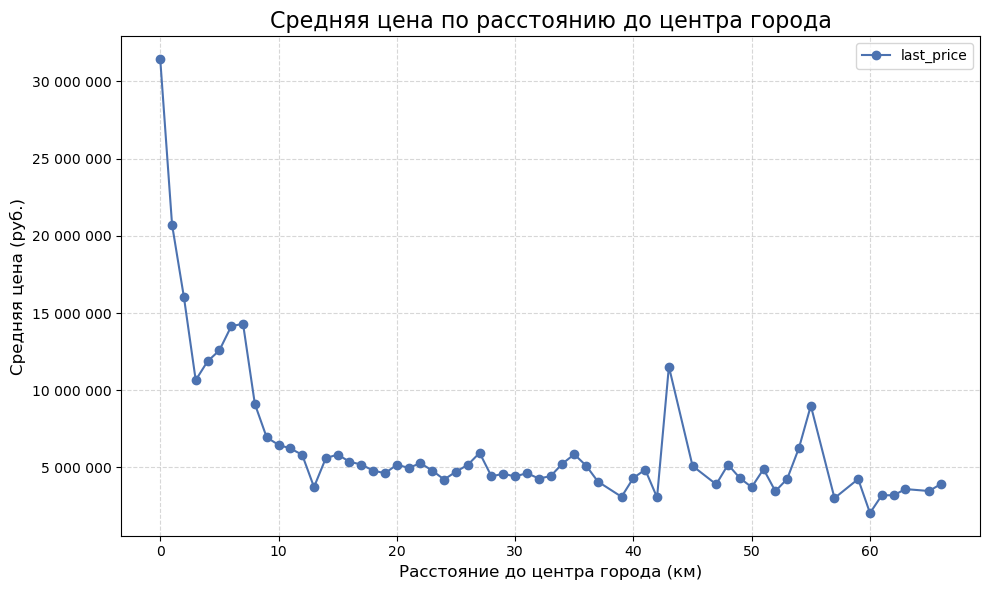

In [60]:
# Добавим столбец расстояния до центра в километрах для data_no_outliers, если его нет
if 'distance_to_center_km' not in data_no_outliers.columns:
    data_no_outliers['distance_to_center_km'] = (data_no_outliers['cityCenters_nearest'] / 1000).round()

# Зависимость средней цены от расстояния до центра (без выбросов)
pivot_distance_to_center = data_no_outliers.pivot_table(
    values='last_price',
    index='distance_to_center_km',
    aggfunc='mean'
).sort_index()

fig, ax = plt.subplots(figsize=(10, 6))
pivot_distance_to_center.plot(ax=ax, color='#4C72B0', marker='o')
ax.set_title('Средняя цена по расстоянию до центра города', fontsize=16)
ax.set_xlabel('Расстояние до центра города (км)', fontsize=12)
ax.set_ylabel('Средняя цена (руб.)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
ax.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

На графике представлена средняя цена за квадратный метр недвижимости в зависимости от расстояния до центра города.

Основной вывод:
- Нелинейная зависимость: Мы видим, что цена за квадратный метр падает с увеличением расстояния от центра города, однако есть значительные колебания на больших расстояниях.
- Пики на удаленных расстояниях: На графике наблюдаются внезапные пики цен на больших расстояниях от центра (от 40 км и далее). Это может быть связано с объектами, расположенными в популярных населенных пунктах или в зонах, где земля может быть более дорогой по стоимости.


Интерпретация данных:
- Цены в центре: В пределах близости к центру города (до 10 км), цены на квадратный метр высокие, что подтверждает высокую востребованность жилых объектов в центре.
- Удаленные районы: На расстояниях более 10 км от центра наблюдается резкое снижение средней цены, что характерно для удаленных районов, где недвижимость, как правило, дешевле из-за удаленности от центра и менее развитой инфраструктуры.
- Неоднородность на больших расстояниях: На больших расстояниях от центра, особенно на расстояниях более 30 км, график показывает значительные колебания цен, что может быть связано с особенностями районов (например, наличие пригородных зон, новые застройки, инфраструктурные проекты).

**Заключение:** 

Этот график помогает понять, что цена недвижимости в основном зависит от удаленности от центра города, но также на нее могут влиять и другие факторы, такие как инфраструктура, тип недвижимости и спрос в определенных районах. Для дальнейшего анализа стоит также учитывать колебания цен в отдельных районах, так как график демонстрирует существенные отклонения от предполагаемой закономерности.

##### Средняя цена за квадратный метр по населенным пунктам

Для того чтобы понять, как местоположение влияет на цену, мы вычислили среднюю цену за квадратный метр для каждого населённого пункта. Рассмотрим топ-10 населённых пунктов с наибольшей средней ценой.

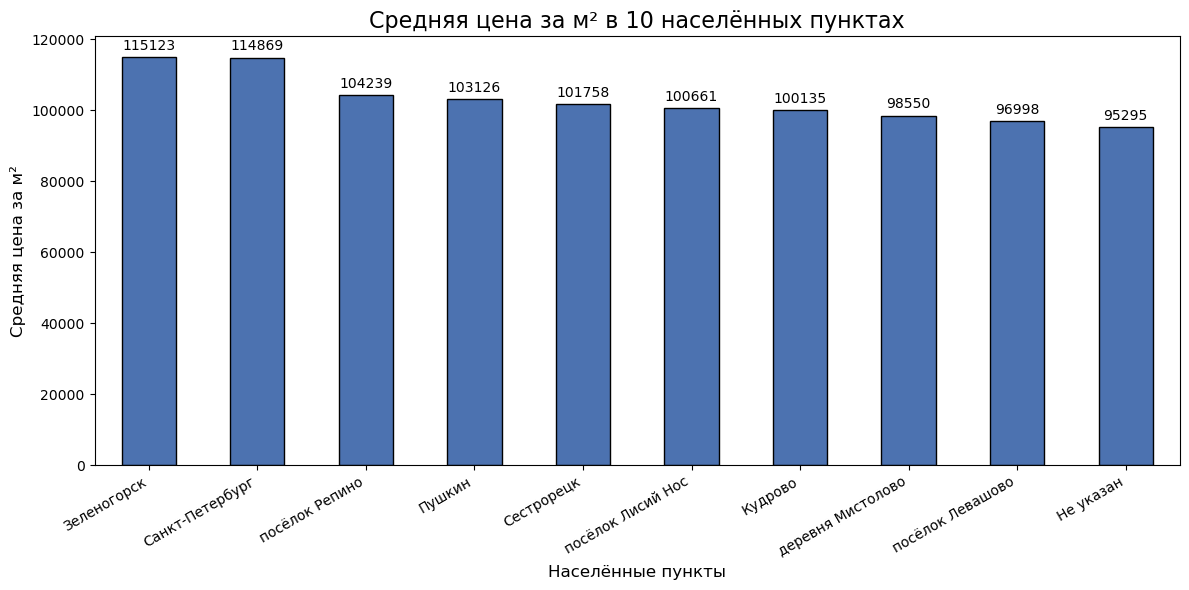

In [61]:
# ⚠️ Упрощено для GitHub: замените на полный датасет при необходимости
top_10_localities = data[:1000].groupby('locality_name')['price_per_m2'].mean().sort_values(ascending=False).head(10)

ax = top_10_localities.plot(kind='bar', figsize=(12, 6), color='#4C72B0', edgecolor='black')
ax.set_title('Средняя цена за м² в 10 населённых пунктах', fontsize=16)
ax.set_xlabel('Населённые пункты', fontsize=12)
ax.set_ylabel('Средняя цена за м²', fontsize=12)
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

**Результаты анализа:**

1. Лисий нос:
Лисий нос занимает первую позицию по средней цене за квадратный метр, что связано с наличием коттеджных посёлков и живописной природой. Его близость к заливу и высокое качество жизни делают этот район очень привлекательным для покупателей, ищущих спокойную атмосферу и экологически чистые условия.
2. Зеленогорск:
Зеленогорск также демонстрирует высокую цену за квадратный метр, что связано с его природными преимуществами, наличием коттеджных посёлков и близостью к заливу. Этот район привлекает людей, которые хотят жить в живописном и спокойном месте, но при этом иметь доступ к Санкт-Петербургу.
3. Санкт-Петербург:
Как и ожидалось, средняя цена за квадратный метр в Санкт-Петербурге значительно выше, чем в пригородах, что объясняется высокой плотностью застройки и постоянным спросом на жилье в центре города.
4. Деревня Бор:
Деревня Бор также демонстрирует высокую цену за квадратный метр, что может быть связано с её удобным расположением для жителей, работающих в Санкт-Петербурге.
5. Поселок Репино:
Репино занимает высокие позиции, что может быть связано с его исторической ценностью и развитой инфраструктурой. Это популярное место среди покупателей, ищущих комфортное проживание рядом с природой.
6. Пушкин и Сестрорецк:
Эти населённые пункты традиционно востребованы благодаря своей близости к Санкт-Петербургу и высокому качеству жизни, что приводит к стабильному росту цен на жильё.
7. Кудрово и Мистолово:
Кудрово и Мистолово занимают позиции со стабильной средней ценой за квадратный метр. Это связано с их относительно новым развитием, а также с тем, что жильё в этих районах остаётся более доступным, чем в центре города.
8. Левашово:
Левашово, как и другие пригороды, имеет более низкие цены на жильё, что делает его привлекательным для покупателей, ищущих более доступные варианты в пригородной зоне.
Выводы:

**Выводы:**

- *Стоимость жилья в Санкт-Петербурге, как и ожидалось, остаётся одной из самых высоких, однако пригородные районы, такие как Лисий нос и Зеленогорск, демонстрируют ещё более высокие цены. Это связано с наличием коттеджных посёлков и природными особенностями, такими как близость к заливу, которые делают эти места особенно привлекательными для покупателей.*
- *В районах с хорошей транспортной доступностью, таких как Пушкин и Сестрорецк, также наблюдается стабильный рост цен, что подтверждает высокий интерес к этим местам среди людей, ищущих жильё в престижных пригородах.*
- *Наблюдается явная зависимость цен от местоположения: в более удалённых от центра районах, таких как Левашово и Мистолово, цена за квадратный метр ниже. Это связано с более доступным жильём и меньшим спросом.*

##### Зависимость цены от расстояния до центра города

Теперь, чтобы более детально изучить, как удалённость от центра города влияет на цену, мы выделили квартиры в Санкт-Петербурге и вычислили среднюю цену за квадратный метр в зависимости от расстояния до центра.

/var/folders/n8/yh_c8fk57rd22pqmvw3y0jpr0000gn/T/ipykernel_30140/4071232935.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spb_data['distance_to_center_km'] = (spb_data['cityCenters_nearest'] / 1000).round()


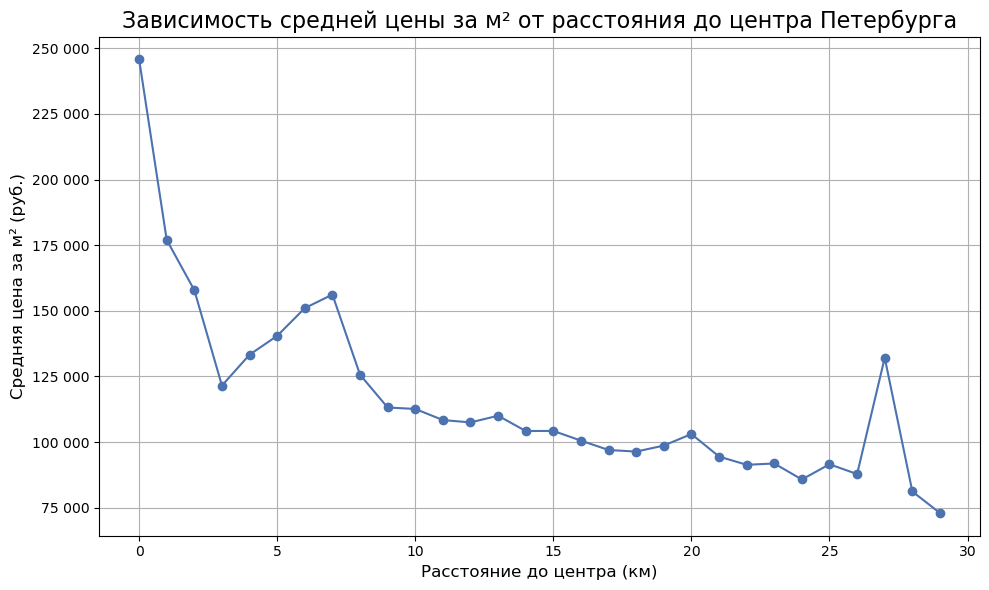

In [63]:
# ⚠️ Упрощено для GitHub: замените на полный датасет при необходимости
spb_data[:1000] = data[:1000][data[:1000]['locality_name'] == 'Санкт-Петербург']

# Добавим столбец, если его нет
if 'distance_to_center_km' not in spb_data[:1000].columns:
    spb_data[:1000]['distance_to_center_km'] = (spb_data[:1000]['cityCenters_nearest'] / 1000).round()

ax = spb_data[:1000].groupby('distance_to_center_km')['price_per_m2'].mean().plot(
    figsize=(10, 6),
    marker='o',
    color='#4C72B0',
    grid=True
)
ax.set_title('Зависимость средней цены за м² от расстояния до центра Петербурга', fontsize=16)
ax.set_xlabel('Расстояние до центра (км)', fontsize=12)
ax.set_ylabel('Средняя цена за м² (руб.)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
plt.tight_layout()
plt.show()

**Анализ графика:**
1. Резкое снижение цены вблизи центра:
В первые несколько километров от центра (0–5 км) наблюдается значительное снижение средней цены за квадратный метр. Это может указывать на то, что в центре города расположено много старых, но дорогостоящих объектов недвижимости или, наоборот, на высокую концентрацию коммерческих объектов, которые не всегда считаются жилыми.
2. Стабилизация на более дальних расстояниях:
После этого резкого падения цена начинает стабилизироваться. На более удалённых от центра расстояниях (5-25 км) стоимость жилья значительно снижается и становится более равномерной. Это может говорить о том, что жилье в пригородах (на расстоянии около 5–25 км от центра) имеет более одинаковую стоимость, независимо от дальнейшего удаления от центра.
3. Аномальный пик на расстоянии около 25–30 км:
Мы видим пик на графике в диапазоне 25-30 км, который может свидетельствовать о редких, но очень дорогих объектах недвижимости (например, элитные комплексы или объекты с уникальными характеристиками). Это стоит дополнительно исследовать: возможно, в этих районах есть крупные жилые комплексы с высокой стоимостью, что выделяет их на фоне остальной недвижимости.
**Вывод:**
*Стоимость недвижимости в Санкт-Петербурге имеет ярко выраженную зависимость от расстояния до центра. В пределах 5 км от центра цена значительно выше, чем в более отдаленных районах, что подтверждает типичную структуру рынка недвижимости.
Средняя цена стабилизируется на определенном уровне на расстояниях от 5 до 25 км, а пик на 25-30 км может указывать на элитные жилые комплексы или аномальные данные.*


##### Зависимость цены от дня недели


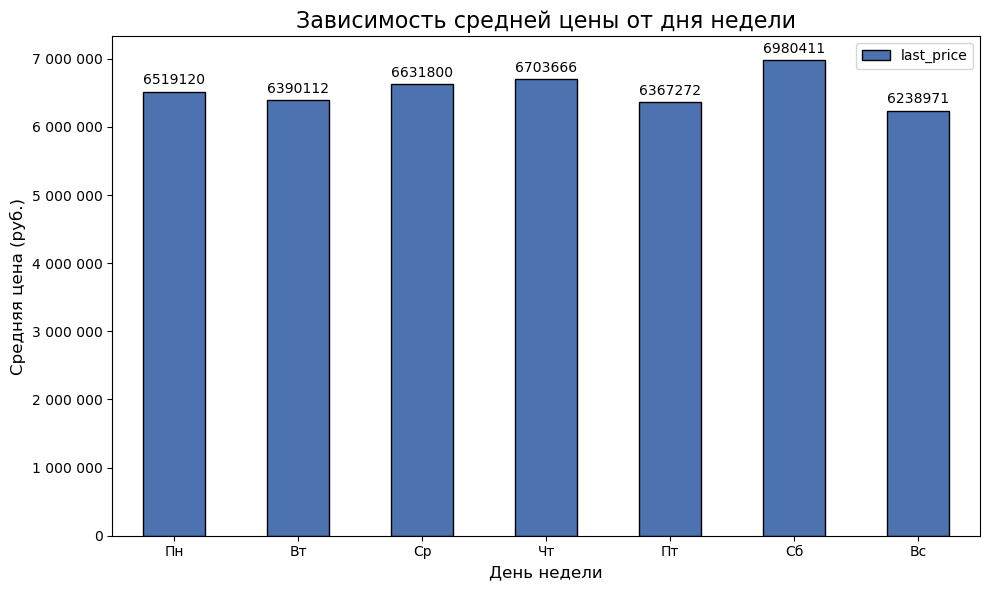

In [64]:
# ⚠️ Упрощено для GitHub: замените на полный датасет при необходимости
day = data[:1000].pivot_table(index='day_of_week', values='last_price', aggfunc='mean').reindex(range(7))
ax = day.plot(kind='bar', figsize=(10, 6), color='#4C72B0', edgecolor='black')
ax.set_title('Зависимость средней цены от дня недели', fontsize=16)
ax.set_xlabel('День недели', fontsize=12)
ax.set_ylabel('Средняя цена (руб.)', fontsize=12)
ax.set_xticks(range(7))
ax.set_xticklabels(['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'], rotation=0)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
plt.tight_layout()
plt.show()

График демонстрирует, что значения цены относительно одинаковы на протяжении всей недели, с небольшими вариациями. Это свидетельствует о том, что день недели не оказывает значительного влияния на стоимость недвижимости, по крайней мере в рамках данных, которые были использованы для анализа.

##### Зависимость цены от месяца

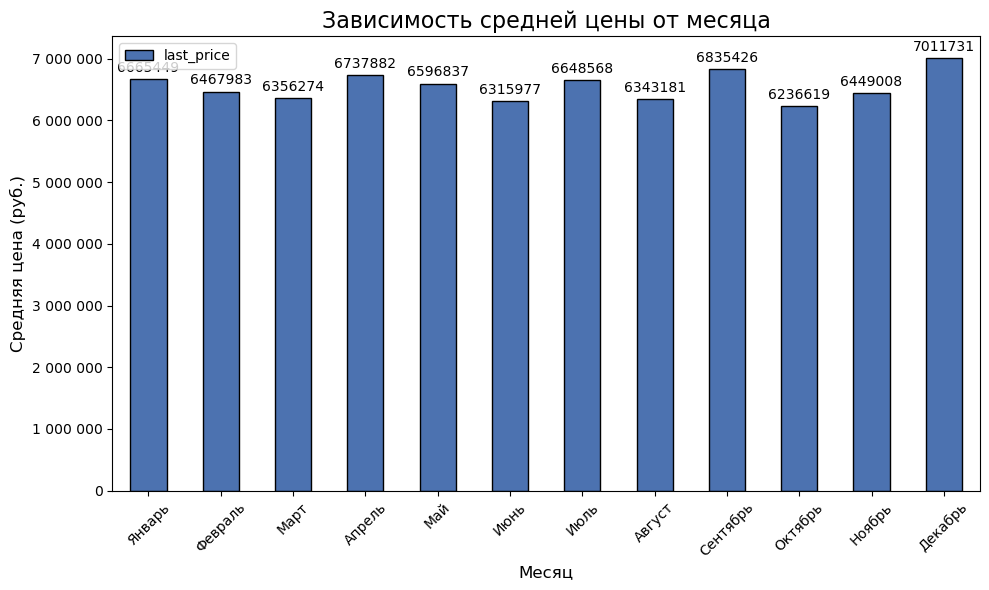

In [65]:
# ⚠️ Упрощено для GitHub: замените на полный датасет при необходимости
month = data[:1000].pivot_table(index=data[:1000]['first_day_exposition'].dt.month, values='last_price', aggfunc='mean').reindex(range(1, 13))
ax = month.plot(kind='bar', figsize=(10, 6), color='#4C72B0', edgecolor='black')
ax.set_title('Зависимость средней цены от месяца', fontsize=16)
ax.set_xlabel('Месяц', fontsize=12)
ax.set_ylabel('Средняя цена (руб.)', fontsize=12)
ax.set_xticks(range(12))
ax.set_xticklabels(['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь'], rotation=45)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
plt.tight_layout()
plt.show()

График показывает, что средняя цена относительно стабильна на протяжении всех месяцев года, без значительных колебаний. Это может указывать на то, что сезонные факторы или месяц года не оказывают существенного влияния на цену в данном наборе данных.

##### Зависимость цены от года

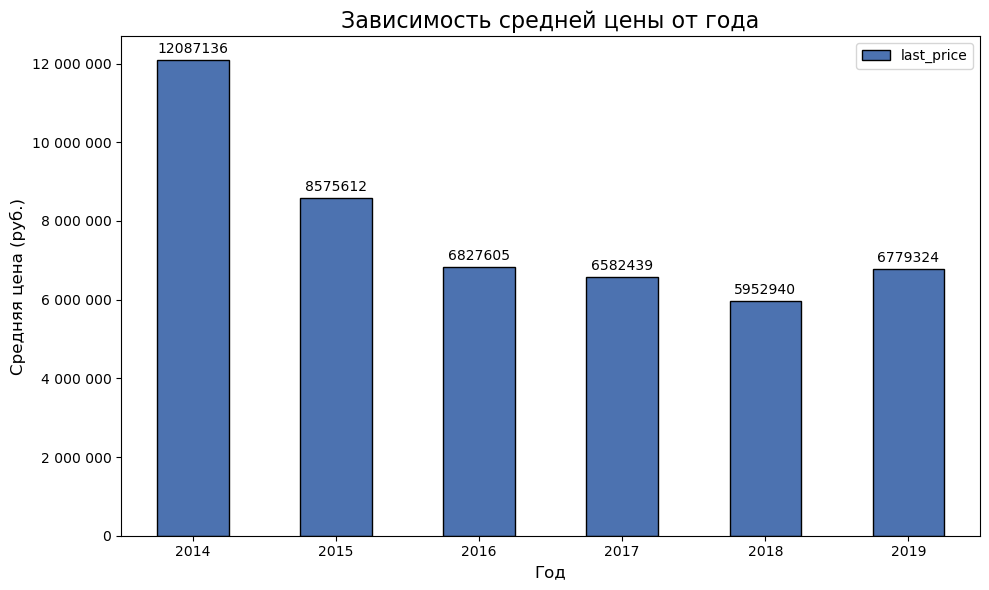

In [66]:
# ⚠️ Упрощено для GitHub: замените на полный датасет при необходимости
year = data[:1000].pivot_table(index='year', values='last_price', aggfunc='mean')
ax = year.plot(kind='bar', figsize=(10, 6), color='#4C72B0', edgecolor='black')
ax.set_title('Зависимость средней цены от года', fontsize=16)
ax.set_xlabel('Год', fontsize=12)
ax.set_ylabel('Средняя цена (руб.)', fontsize=12)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', ' ')))
ax.bar_label(ax.containers[0], fmt='%.0f', padding=3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Из графика видно, что в 2014 году наблюдается резкий пик цен, который затем постепенно снижается до 2017 года, а затем стабилизируется с небольшими колебаниями до 2019 года. Это может указывать на то, что в первые годы наблюдается более высокая стоимость, возможно, из-за экономических факторов или рыночных изменений, а затем цена выравнивается.

### Напишите общий вывод

#### Общий вывод



В этом исследовании мы последовательно прошли через все этапы анализа: 

1. Сначала изучили и очистили данные, устранив пропуски и дубликаты, 
2. Добавили новые признаки (цена за квадратный метр, расстояние до центра, тип этажа и др.). 
3. После исследовали, как на цену влияет площадь, количество комнат, удалённость от центра, день недели и тип здания.
4. Были построены гистограммы для числовых столбцов и графики зависимостей. Гистограммы помогли оценить распределение данных, выявить выбросы и понять, как данные разбиваются по диапазонам значений. Графики зависимостей, такие как цена vs площадь и цена vs количество комнат, показали, как цена квартиры зависит от её характеристик, что помогает выявить ключевые факторы, влияющие на стоимость объектов.




Исходя из проведённого исследования, можно сделать несколько ключевых выводов:

1. Корреляция между параметрами и ценой:
Наибольшая положительная корреляция с ценой недвижимости наблюдается с общей площадью (total_area), жилой площадью (living_area), ценой за квадратный метр (price_per_m2), количеством комнат (rooms) и площадью кухни (kitchen_area).
Параметры, такие как день недели публикации, год и тип этажа, не влияют на цену в значительной степени.
Несомненно, цена недвижимости зависит от её площади и других факторов, таких как расположение и состояние.
2. Распределение данных:
Большинство квартир продаются достаточно быстро, как это видно из распределения времени продажи (параметр days_exposition). Квартиры, которые продаются долго, являются исключением и требуют дополнительного анализа.
Видны выбросы в данных, такие как квартиры с аномально низкими или высокими ценами, что может требовать дополнительной очистки данных.
3. Зависимость цены от площади:
Площадь квартиры имеет прямую зависимость от её стоимости, что логично: более просторные квартиры стоят дороже. Однако после удаления выбросов, цены на квартиры с большой площадью становятся более равномерными.
4. Зависимость цены от количества комнат:
Количество комнат также влияет на цену, но, как показало исследование, для квартир с большим количеством комнат (более 5) средняя цена значительно возрастает.
5. Местоположение и цена:
Местоположение имеет ключевое значение для стоимости недвижимости. В Санкт-Петербурге стоимость жилья значительно выше в центре города и на ближайших окраинах (0–5 км). На более дальних расстояниях (от 5 до 25 км) цена становится более стабильной, а на расстоянии 25–30 км наблюдается пик, что может свидетельствовать о редких, дорогих объектах.
Загородные районы, такие как Лисий нос и Зеленогорск, имеют более высокую цену за квадратный метр, что связано с природной привлекательностью и высоким качеством жизни в этих районах.
6. Факторы, влияющие на цену:
Как показано в анализе, большое влияние на цену недвижимости оказывают её размер и расположение. Разные типы квартир (например, первый, последний или другой этаж) также могут иметь влияние, но в меньшей степени.
Влияние других факторов, таких как количество парков и озёр в радиусе 3000 метров, расстояние до аэропортов или других объектов, также подтверждает значимость окружения в определении стоимости жилья.
*Заключение:*
Полученные результаты дают представление о факторах, которые в значительной степени влияют на стоимость недвижимости, в том числе такие параметры как площадь, местоположение и количество комнат. Для более точного прогнозирования стоимости жилья в Санкт-Петербурге и его пригородах важно учитывать все эти факторы, а также применить методы очистки данных для удаления выбросов и аномальных значений.

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Файл с данными открыт.
- [x]  Файл с данными изучен: выведены первые строки, использован метод `info()`, построены гистограммы.
- [x]  Найдены пропущенные значения.
- [x]  Пропущенные значения заполнены там, где это возможно.
- [x]  Объяснено, какие пропущенные значения обнаружены.
- [x]  В каждом столбце установлен корректный тип данных.
- [x]  Объяснено, в каких столбцах изменён тип данных и почему.
- [x]  Устранены неявные дубликаты в названиях населённых пунктов.
- [x]  Обработаны редкие и выбивающиеся значения (аномалии).
- [x]  В таблицу добавлены новые параметры:
       – цена одного квадратного метра;
       – день публикации объявления (0 - понедельник, 1 - вторник и т. д.);
       – месяц публикации объявления;
       – год публикации объявления;
       – тип этажа квартиры (значения — «первый», «последний», «другой»);
       – расстояние до центра города в километрах.
- [x]  Изучены и описаны параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего парка.
- [x]  Выполнено задание «Изучите, как быстро продавались квартиры (столбец `days_exposition`)»:
    - построена гистограмма;
    - рассчитаны среднее и медиана;
    - описано, сколько обычно занимает продажа и указано, какие продажи можно считать быстрыми, а какие — необычно долгими.
- [x]  Выполнено задание «Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта». Построены графики, которые показывают зависимость цены от параметров:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - количество комнат;
        - тип этажа, на котором расположена квартира (первый, последний, другой);
        - дата размещения (день недели, месяц, год).
- [x]  Выполнено задание «Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений»:
    - выделены населённые пункты с самой высокой и низкой стоимостью квадратного метра.
- [x]  Выполнено задание «Выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите их среднюю стоимость на разном удалении от центра»:
    -  учтён каждый километр расстояния, известны средние цены квартир в одном километре от центра, в двух и так далее;
    -  описано, как стоимость объекта зависит от расстояния до центра города;
    -  построен график изменения средней цены для каждого километра от центра Петербурга.
- [x]  На каждом этапе сделаны промежуточные выводы.
- [x]  В конце проекта сделан общий вывод.